Import libraries

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats  # scipy for statistics modelling
import pingouin as pg # for anova effect size and pairwise comparison
import statsmodels.api as sm # statsmodel module 
from statsmodels.formula.api import ols # ordinary least regression anova
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np #numpy
import spotipy
import requests
from bs4 import BeautifulSoup
import csv

## Scrape the Spotify top 200

In [3]:
 def get_spotify_hits(country):
    #gonna have to change the us from a permanent variable to one that shifts
    page = requests.get(f'https://spotifycharts.com/regional/{country}/weekly/latest')
    page
    soup = BeautifulSoup(page.content, 'html.parser')
    #test the soup connection
    table = soup.find('table', attrs={'class': 'chart-table'})

    table_body = table.find('tbody')
    table = []
    #for each entry into the table go get all the information
    for tr in table_body.find_all('tr'):
        #create an empty dictionary to put stuff in
        dict_1 = {}
        #get the name of the artist
        entry_name = tr.find('td', attrs={'class': 'chart-table-track'}).find('span').text
        entry_name = entry_name.replace('by ', '').strip()
        #add it to the dictionary associated with the artist key
        dict_1['artist'] = entry_name
        #get all of the song titles
        title = tr.find('td', attrs={'class': 'chart-table-track'}).find('strong').text
        #add it to the dictionary associated with the song_title key
        dict_1['song_title'] = title
        #get the number of streams
        streaming_number = tr.find('td', attrs={'class': 'chart-table-streams'}).text
        streaming_number = streaming_number.replace(',', '')
        streaming_number = int(streaming_number)
        #add it to the dictionary associated with stream count
        dict_1['stream_count'] = streaming_number
        dict_1[f'{country}'] = country
        table.append(dict_1)
    #drop duplicate entries from list
#     keys = table[0].keys()
#     print(keys)
#     for row in table:
#         with open('spotifyproject_data', 'w') as myfile:
#             wr = csv.DictWriter(myfile, keys)
#             wr.writeheader()
#             wr.writerow(table)
#     #save to csv
    
#     f = open("songs.csv", "w")
#     writer = csv.DictWriter(
#         f, fieldnames=['artist', 'song_title', 'stream_count', country])
#     writer.writeheader()
#     writer.writerows(
#         table)
#     f.close()
    return table

In [4]:
#example country scrapped
get_spotify_hits('us')

[{'artist': 'Arizona Zervas',
  'song_title': 'ROXANNE',
  'stream_count': 10919777,
  'us': 'us'},
 {'artist': 'Post Malone',
  'song_title': 'Circles',
  'stream_count': 8572624,
  'us': 'us'},
 {'artist': 'Travis Scott',
  'song_title': 'HIGHEST IN THE ROOM',
  'stream_count': 8480933,
  'us': 'us'},
 {'artist': 'Juice WRLD',
  'song_title': 'Bandit (with YoungBoy Never Broke Again)',
  'stream_count': 7778890,
  'us': 'us'},
 {'artist': 'Selena Gomez',
  'song_title': 'Lose You To Love Me',
  'stream_count': 7090786,
  'us': 'us'},
 {'artist': 'Lewis Capaldi',
  'song_title': 'Someone You Loved',
  'stream_count': 6058702,
  'us': 'us'},
 {'artist': 'YNW Melly',
  'song_title': "223's (feat. 9lokknine)",
  'stream_count': 5924869,
  'us': 'us'},
 {'artist': 'blackbear',
  'song_title': 'hot girl bummer',
  'stream_count': 5809764,
  'us': 'us'},
 {'artist': 'Lil Mosey',
  'song_title': 'Stuck In A Dream (feat. Gunna)',
  'stream_count': 5689981,
  'us': 'us'},
 {'artist': 'Maroon 5

In [5]:
#list of countries being scrapped
countries = ['us', 'gb', 'ad', 'ar', 'at', 'au', 'be', 'bg', 'bo', 'br',
'ca', 'ch', 'cl', 'co', 'cr', 'cy', 'cz', 'de', 'dk', 'do', 'ec', 'ee',
'es', 'fi', 'fr', 'gr', 'gt', 'hk', 'hn', 'hu', 'id', 'ie', 'il', 'in',
'is', 'it', 'jp', 'lt', 'lu', 'lv', 'mt', 'mx', 'my', 'ni', 'nl', 'no',
'nz', 'pa', 'pe', 'ph', 'pl', 'pt', 'py', 'ro', 'se', 'sg', 'sk', 'sv',
'th', 'tr', 'tw', 'uy', 'vn', 'za']

In [6]:
#define the function to get all of the countries
def all_country_grabber(countries_list):
    for country in countries:
        get_spotify_hits(country)
    return

In [7]:
#call the get all countries function
all_country_grabber(countries)

In [278]:
usdf = pd.read_csv("US.csv")
usdf = usdf.rename(columns=usdf.iloc[0])
usdf = usdf.iloc[1:]
usdf['Country'] = 'US'
usdf['Continent'] = 'NorthAmerica'

In [279]:
dedf = pd.read_csv("DE.csv")
dedf = dedf.rename(columns=dedf.iloc[0])
dedf = dedf.iloc[1:]
dedf['Country'] = 'DE'
dedf['Continent'] = 'Europe'

In [280]:
cadf = pd.read_csv("CA.csv")
cadf = cadf.rename(columns=cadf.iloc[0])
cadf = cadf.iloc[1:]
cadf['Country'] = 'CA'
cadf['Continent'] = 'NorthAmerica'

In [281]:
frdf = pd.read_csv("FR.csv")
frdf = frdf.rename(columns=frdf.iloc[0])
frdf = frdf.iloc[1:]
frdf['Country'] = 'FR'
frdf['Continent'] = 'Europe'

In [294]:
brdf = pd.read_csv("BR.csv")
brdf = brdf.rename(columns=brdf.iloc[0])
brdf = brdf.iloc[1:]
brdf['Country'] = 'BR'
brdf['Continent'] = 'LatinAmerica'

In [295]:
mxdf = pd.read_csv("MX.csv")
mxdf = mxdf.rename(columns = mxdf.iloc[0])
mxdf = mxdf.iloc[1:]
mxdf['Country'] = 'MX'
mxdf['Continent'] = 'LatinAmerica'

In [296]:
frames = [usdf,cadf,dedf,frdf,brdf,mxdf] # Concat dataframes into new dataframe
df = pd.concat(frames, sort=False)
df['Streams'] = df['Streams'].astype(str).astype(int) # change data types


In [102]:
## Connect to DB server on AWS
import mysql.connector 
from mysql.connector import errorcode
import config
## Connecting to the database
## connecting to the database using 'connect()' method
## it takes 3 required parameters 'host', 'user', 'passwd'
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password
)

In [103]:
cursor = cnx.cursor()

In [105]:
## Create new DB 
db_name = 'mod3'
def create_database(cursor, database):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(database))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)
        
    #above is python code that is going to connect to SQL queries w/ cursor.execute
    #cursor knows to take SQL query and send it to server to run code
    #try & except is error handling within python
    #format takes in database and tries to run it
    #if failed, except will tell you error and why it failed
    #above is a function to create a database

try:
    cursor.execute("USE {}".format(db_name))
except mysql.connector.Error as err:
    print("Database {} does not exists.".format(db_name))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, db_name)
        print("Database {} created successfully.".format(db_name))
        cnx.database = db_name####
    else:
        print(err)
        exit(1)

create table in database

In [135]:
TABLES = {}
TABLES['germany'] = \
'''CREATE TABLE IF NOT EXISTS germany (
      Position int,
      Track varchar(200) NOT NULL UNIQUE PRIMARY KEY, 
      Artist varchar(200), 
      Streams int,
      Country varchar(200),
      Continent varchar(200) NOT NULL
)  ENGINE=INNODB;
'''


In [136]:
for table_name in TABLES:
    table_description = TABLES[table_name]
    try:
        print("Creating table {}: ".format(table_name), end='')
        cursor.execute(table_description)
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print("already exists.")
        else:
            print(err.msg)
    else:
        print("OK")



Creating table germany: OK


get tuples

In [108]:
def get_review_tuples(d):
    tuples = []
    for i in range(len(d)):
        t = (d.iloc[i]['Position'], d.iloc[i]['TrackName'], d.iloc[i]['Artist'], d.iloc[i]['Streams'],
            d.iloc[i]['Country'],d.iloc[i]['Continent'])
        tuples.append(t)
    return tuples


INSERT TABLES INTO DATABASE

In [137]:
subset = dedf[['Position', 'Track Name', 'Artist', 'Streams', 'Country', 'Continent']]
tuples = [tuple(x) for x in subset.values]

In [138]:
addboxes = ("INSERT INTO mod3.germany" 
               "(Position,Track, Artist, Streams, Country, Continent)"
               "VALUES (%s, %s, %s, %s, %s, %s)")
cursor.executemany(addboxes, tuples)
cnx.commit()

In [139]:
subset = frdf[['Position', 'Track Name', 'Artist', 'Streams', 'Country', 'Continent']]
tuples = [tuple(x) for x in subset.values]

In [ ]:
addboxes = ("INSERT INTO mod3.france" 
               "(Position, Track_name, Artist, Streams, Country, Continent)"
               "VALUES (%s, %s, %s, %s, %s, %s)")
cursor.executemany(addboxes, tuples)
cnx.commit()

In [149]:
subset = brdf[['Position', 'Track Name', 'Artist', 'Streams', 'Country', 'Continent']]
tuples = [tuple(x) for x in subset.values]

In [150]:
addboxes = ("INSERT INTO mod3.brazil" 
               "(Position, Track_name, Artist, Streams, Country, Continent)"
               "VALUES (%s, %s, %s, %s, %s, %s)")
cursor.executemany(addboxes, tuples)
cnx.commit()

In [151]:
subset = mxdf[['Position', 'Track Name', 'Artist', 'Streams', 'Country', 'Continent']]
tuples = [tuple(x) for x in subset.values]

In [152]:
addboxes = ("INSERT INTO mod3.Mexico" 
               "(Position, Track_name, Artist, Streams, Country, Continent)"
               "VALUES (%s, %s, %s, %s, %s, %s)")
cursor.executemany(addboxes, tuples)
cnx.commit()

In [153]:
subset = dedf[['Position', 'Track Name', 'Artist', 'Streams', 'Country', 'Continent']]
tuples = [tuple(x) for x in subset.values]

In [154]:
addboxes = ("INSERT INTO mod3.Germany" 
               "(Position, Track_name, Artist, Streams, Country, Continent)"
               "VALUES (%s, %s, %s, %s, %s, %s)")
cursor.executemany(addboxes, tuples)
cnx.commit()

In [156]:
subset = cadf[['Position', 'Track Name', 'Artist', 'Streams', 'Country', 'Continent']]
tuples = [tuple(x) for x in subset.values]

In [157]:
addboxes = ("INSERT INTO mod3.Canada" 
               "(Position, Track_name, Artist, Streams, Country, Continent)"
               "VALUES (%s, %s, %s, %s, %s, %s)")
cursor.executemany(addboxes, tuples)
cnx.commit()

In [158]:
subset = usdf[['Position', 'Track Name', 'Artist', 'Streams', 'Country', 'Continent']]
tuples = [tuple(x) for x in subset.values]

In [159]:
addboxes = ("INSERT INTO mod3.United_states" 
               "(Position, Track_name, Artist, Streams, Country, Continent)"
               "VALUES (%s, %s, %s, %s, %s, %s)")
cursor.executemany(addboxes, tuples)
cnx.commit()

 FUNCTION TO INSERT TABLE INTO DATABASE

In [127]:
def insertdb(data):
    ls = get_review_tuples(data)
    country = 
    add_music = ("INSERT INTO country " 
               "(Position, Track, Artist, Streams, Country, Continent)"
               "VALUES (%s, %s, %s, %s, %s, %s)")
    
    cursor.executemany(add_music, ls)
    cnx.commit()

Text(0.5, 0, 'Country')

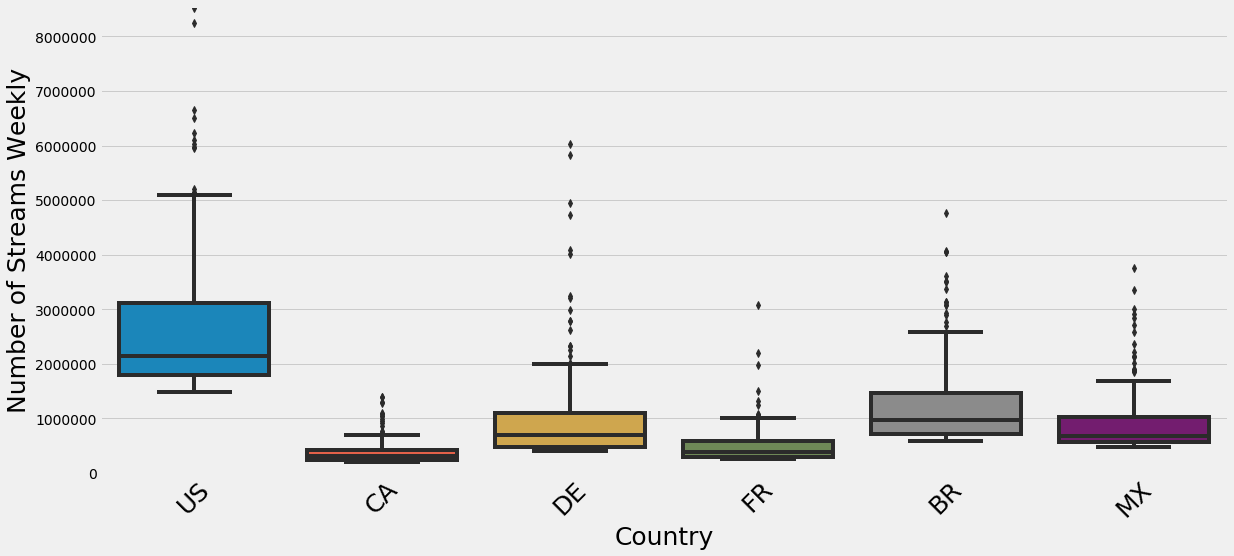

In [298]:
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x='Country', y="Streams", data = df)
fig.axis(ymin=0, ymax=8550000)
plt.xticks(rotation=45, size = 25)
plt.ylabel(ylabel = 'Number of Streams Weekly',size = 25)
plt.xlabel(xlabel = 'Country',size = 25)

Text(0.5, 0, 'Continent')

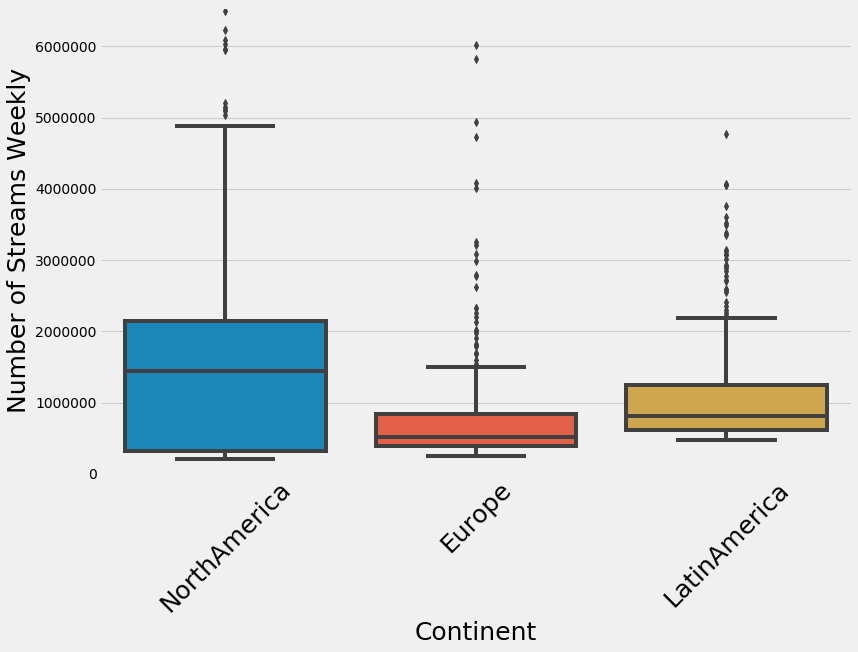

In [299]:
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='Continent', y="Streams", data=df)
fig.axis(ymin=0, ymax=6550000)
plt.xticks(rotation=45, size = 25)
plt.ylabel(ylabel = 'Number of Streams Weekly',size = 25)
plt.xlabel(xlabel = 'Continent',size = 25)

In [268]:
# ONE WAY ANOVA

In [300]:
formula = 'Streams ~ Country'
lm = ols(formula, df).fit()

#ANOVA on country

In [301]:
anova_country = ols('Streams~Country',data=df).fit()

anova_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Streams   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     199.8
Date:                Thu, 14 Nov 2019   Prob (F-statistic):          7.94e-155
Time:                        18:10:35   Log-Likelihood:                -18067.
No. Observations:                1200   AIC:                         3.615e+04
Df Residuals:                    1194   BIC:                         3.618e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.256e+06   5.93e+04     21.190      0.000    1.14e+06    1.37e+06
Country[T.CA] -8.679e+05   8.39e+04    -10.350      0.000   -1.03e+06   -7.03e+05
Country[T.DE] -2.701e+05   8.39e+04     -3.221      0.001   -4.35e+05   -1.06e+05
Country[T.FR] -7.531e+05   8.39e+04     -8.981      0.000   -9.18e+05   -5.89e+05
Country[T.MX] -3.435e+05   8.39e+04     -4.097      0.000   -5.08e+05   -1.79e+05
Country[T.US]   1.45e+06   8.39e+04     17.296      0.000    1.29e+06    1.61e+06
==============================================================================
Omnibus:                      890.172   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16207.410
Skew:                           3.297   Prob(JB):                         0.00
Kurtosis:                      19.753   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#ANOVA ON CONTINENT

In [34]:
anova_continent = ols('Streams~Continent',data=df).fit()

anova_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Streams   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     54.32
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           2.64e-23
Time:                        11:32:30   Log-Likelihood:                -18380.
No. Observations:                1199   AIC:                         3.677e+04
Df Residuals:                    1196   BIC:                         3.678e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  7.448e+05    5.5e+04     13.531      0.000    6.37e+05    8.53e+05
Continent[T.LatinAmerica]  5.028e+05   7.79e+04      6.455      0.000     3.5e+05    6.56e+05
Continent[T.NorthAmerica]  8.028e+05   7.78e+04     10.314      0.000     6.5e+05    9.56e+05
==============================================================================
Omnibus:                      692.504   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6903.291
Skew:                           2.524   Prob(JB):                         0.00
Kurtosis:                      13.616   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# ONE WAY ANOVA  country on streams

In [303]:
esq_sm = table['sum_sq'][0]/(table['sum_sq'][0]+table['sum_sq'][1]) # get the etasquared for anova
table['EtaSq'] = [esq_sm, 'NaN']
print(table)

                  sum_sq      df           F         PR(>F)     EtaSq
C(Country)  7.024329e+14     5.0  199.804378  7.938147e-155  0.455546
Residual    8.395261e+14  1194.0         NaN            NaN       NaN


In [305]:
esq_sm = table['sum_sq'][0]/(table['sum_sq'][0]+table['sum_sq'][1])

table['EtaSq'] = [esq_sm, 'NaN']

print(table)

                    sum_sq      df          F        PR(>F)      EtaSq
C(Continent)  1.299144e+14     2.0  55.064656  1.326462e-23  0.0842528
Residual      1.412045e+15  1197.0        NaN           NaN        NaN


In [329]:
pg.pairwise_tukey(dv='Streams', between='Country', effsize='cohen', data = df)

A   B      mean(A)      mean(B)        diff         se       tail  \
0   BR  CA  1256381.625   388509.575   867872.05  83852.291  two-sided   
1   BR  DE  1256381.625   986252.835   270128.79  83852.291  two-sided   
2   BR  FR  1256381.625   503305.045   753076.58  83852.291  two-sided   
3   BR  MX  1256381.625   912860.685   343520.94  83852.291  two-sided   
4   BR  US  1256381.625  2706685.695 -1450304.07  83852.291  two-sided   
5   CA  DE   388509.575   986252.835  -597743.26  83852.291  two-sided   
6   CA  FR   388509.575   503305.045  -114795.47  83852.291  two-sided   
7   CA  MX   388509.575   912860.685  -524351.11  83852.291  two-sided   
8   CA  US   388509.575  2706685.695 -2318176.12  83852.291  two-sided   
9   DE  FR   986252.835   503305.045   482947.79  83852.291  two-sided   
10  DE  MX   986252.835   912860.685    73392.15  83852.291  two-sided   
11  DE  US   986252.835  2706685.695 -1720432.86  83852.291  two-sided   
12  FR  MX   503305.045   912860.685  -409555.64  83852.291  two-sided   
13  FR  US   503305.045  2706685.695 -2203380.65  83852.291  two-sided   
14  MX  US   912860.685  2706685.695 -1793825.01  83852.291  two-sided   

         T  p-tukey  cohen  
0   10.350  0.00100  1.035  
1    3.221  0.01624  0.322  
2    8.981  0.00100  0.898  
3    4.097  0.00100  0.410  
4  -17.296  0.00100 -1.730  
5   -7.129  0.00100 -0.713  
6   -1.369  0.50000 -0.137  
7   -6.253  0.00100 -0.625  
8  -27.646  0.00100 -2.765  
9    5.760  0.00100  0.576  
10   0.875  0.90000  0.088  
11 -20.517  0.00100 -2.052  
12  -4.884  0.00100 -0.488  
13 -26.277  0.00100 -2.628  
14 -21.393  0.00100 -2.139

In [328]:
pg.pairwise_tukey(dv='Streams', between='Continent',  effsize='cohen', data = df)


A             B      mean(A)      mean(B)        diff  \
0        Europe  LatinAmerica   744778.940  1084621.155 -339842.215   
1        Europe  NorthAmerica   744778.940  1547597.635 -802818.695   
2  LatinAmerica  NorthAmerica  1084621.155  1547597.635 -462976.480   

          se       tail       T  p-tukey  cohen  
0  76800.163  two-sided  -4.425    0.001 -0.313  
1  76800.163  two-sided -10.453    0.001 -0.739  
2  76800.163  two-sided  -6.028    0.001 -0.426

In [306]:
#Most-streamed weekly tracks on Spotify worldwide as of October 17, 2019 (in million streams)
sorteddf = df.sort_values(by=['Streams'],ascending=False).head(20)

In [216]:
sorteddf

Position                                  Track Name          Artist  \
1         1                         HIGHEST IN THE ROOM    Travis Scott   
2         2                                     Circles     Post Malone   
3         3                         Lose You To Love Me    Selena Gomez   
4         4    Bandit (with YoungBoy Never Broke Again)      Juice WRLD   
5         5                                     ROXANNE  Arizona Zervas   
6         6                                  Follow God      Kanye West   
7         7                             Don't Start Now        Dua Lipa   
8         8                           Someone You Loved   Lewis Capaldi   
9         9                             hot girl bummer       blackbear   
10       10                     223's (feat. 9lokknine)       YNW Melly   
1         1                                      Roller      Apache 207   
11       11                                    Memories        Maroon 5   
12       12  Hot (Remix) [feat. Gunna and Travis Scott]      Young Thug   
2         2                                       KARMA            Nimo   
13       13                                     Camelot      NLE Choppa   
14       14                                    Immortal       21 Savage   
15       15           10,000 Hours (with Justin Bieber)      Dan + Shay   
16       16                                Dance Monkey     Tones and I   
17       17              Stuck In A Dream (feat. Gunna)       Lil Mosey   
3         3                   Wieso tust Du dir das an?      Apache 207   

    Streams                                                URL Country  \
1   9395208  https://open.spotify.com/track/3eekarcy7kvN4yt...      US   
2   9248356  https://open.spotify.com/track/21jGcNKet2qwijl...      US   
3   8918735  https://open.spotify.com/track/1HfMVBKM75vxSfs...      US   
4   8522651  https://open.spotify.com/track/6Gg1gjgKi2AK4e0...      US   
5   8252346  https://open.spotify.com/track/1ZPWWSwCkxKfqdp...      US   
6   6657249  https://open.spotify.com/track/2QpGZOhTCHHiKmp...      US   
7   6498336  https://open.spotify.com/track/6WrI0LAC5M1Rw2M...      US   
8   6225730  https://open.spotify.com/track/7qEHsqek33rTcFN...      US   
9   6094241  https://open.spotify.com/track/7aiClxsDWFRQ0Kz...      US   
10  6034293  https://open.spotify.com/track/4sjiIpEv617LDXa...      US   
1   6023839  https://open.spotify.com/track/6hw1Sy9wZ8UCxYG...      DE   
11  5966143  https://open.spotify.com/track/2b8fOow8UzyDFAE...      US   
12  5945805  https://open.spotify.com/track/56AMYGJzxBO6p8v...      US   
2   5822722  https://open.spotify.com/track/6oX9RuILbVIglev...      DE   
13  5205722  https://open.spotify.com/track/4sWuPniHClkInYA...      US   
14  5145217  https://open.spotify.com/track/4IO8X9W69dIQe0E...      US   
15  5124158  https://open.spotify.com/track/2wrJq5XKLnmhRXH...      US   
16  5088913  https://open.spotify.com/track/1rgnBhdG2JDFTbY...      US   
17  5037529  https://open.spotify.com/track/5hDAT527wXWNBnJ...      US   
3   4943377  https://open.spotify.com/track/6dNB3XdAzx7kTf5...      DE   

       Continent  
1   NorthAmerica  
2   NorthAmerica  
3   NorthAmerica  
4   NorthAmerica  
5   NorthAmerica  
6   NorthAmerica  
7   NorthAmerica  
8   NorthAmerica  
9   NorthAmerica  
10  NorthAmerica  
1         Europe  
11  NorthAmerica  
12  NorthAmerica  
2         Europe  
13  NorthAmerica  
14  NorthAmerica  
15  NorthAmerica  
16  NorthAmerica  
17  NorthAmerica  
3         Europe

Text(0.5, 0, 'Number of Streams Weekly')

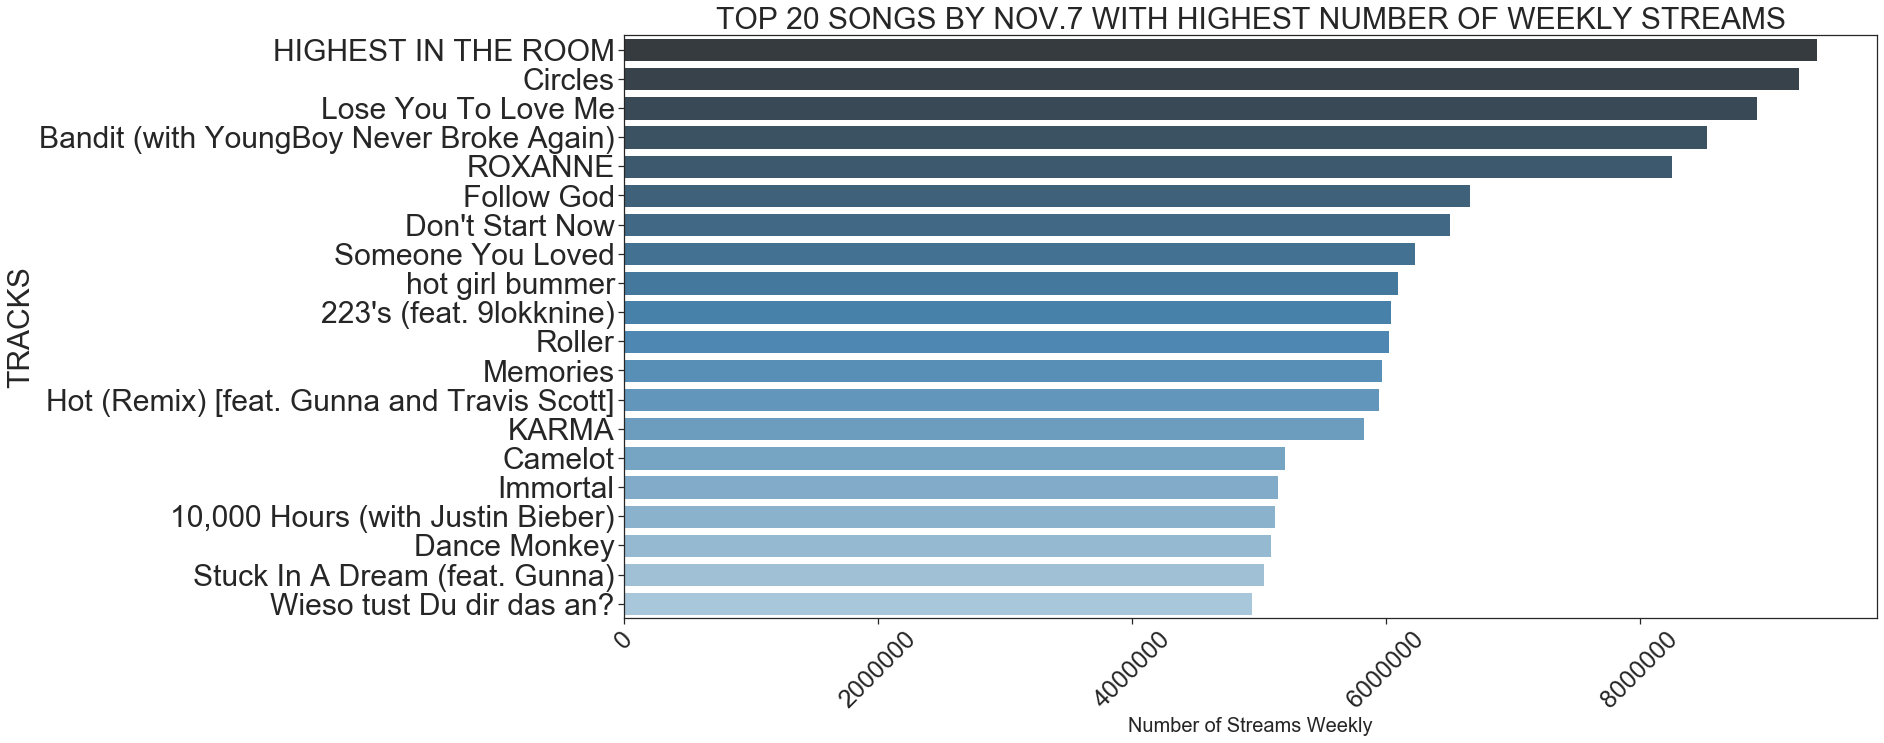

In [356]:
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.barplot(x = 'Streams', y = 'Track Name', data = sorteddf,palette=("Blues_d"))
plt.title('TOP 20 SONGS BY NOV.7 WITH HIGHEST NUMBER OF WEEKLY STREAMS', size = 30)
plt.yticks(size = 30)
plt.xticks(rotation=45, size = 25)
plt.ylabel(ylabel = 'TRACKS',size = 30)
plt.xlabel(xlabel = 'Number of Streams Weekly',size = 20)



Text(0.5, 0, 'Number of Streams Weekly')

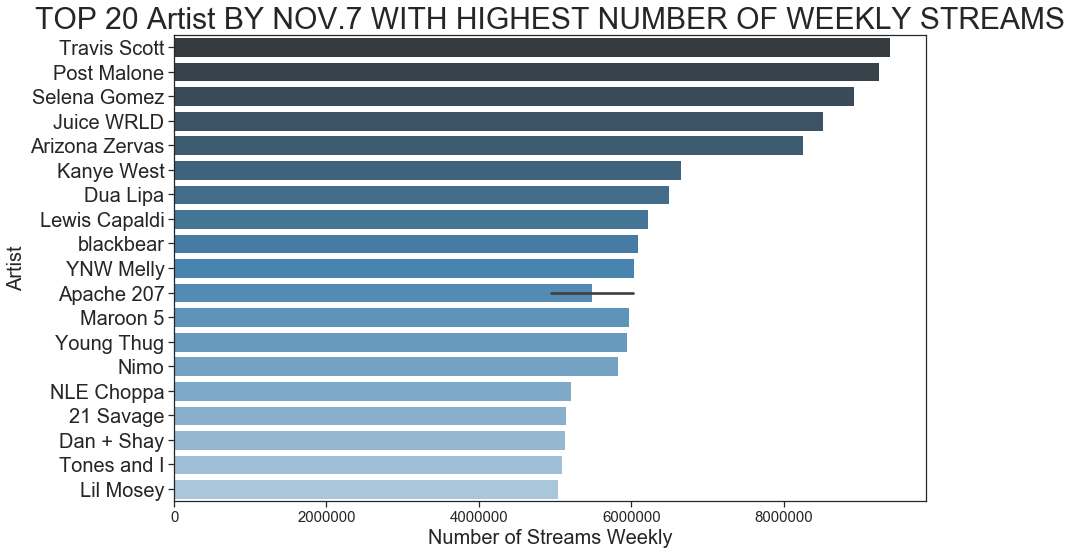

In [357]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sns.barplot(x = 'Streams', y = 'Artist', data = sorteddf,palette=("Blues_d"))
plt.title('TOP 20 Artist BY NOV.7 WITH HIGHEST NUMBER OF WEEKLY STREAMS', size = 30) 
plt.yticks(size = 20)
plt.xticks(size = 15)
plt.ylabel(ylabel = 'Artist',size = 20)
plt.xlabel(xlabel = 'Number of Streams Weekly',size = 20)

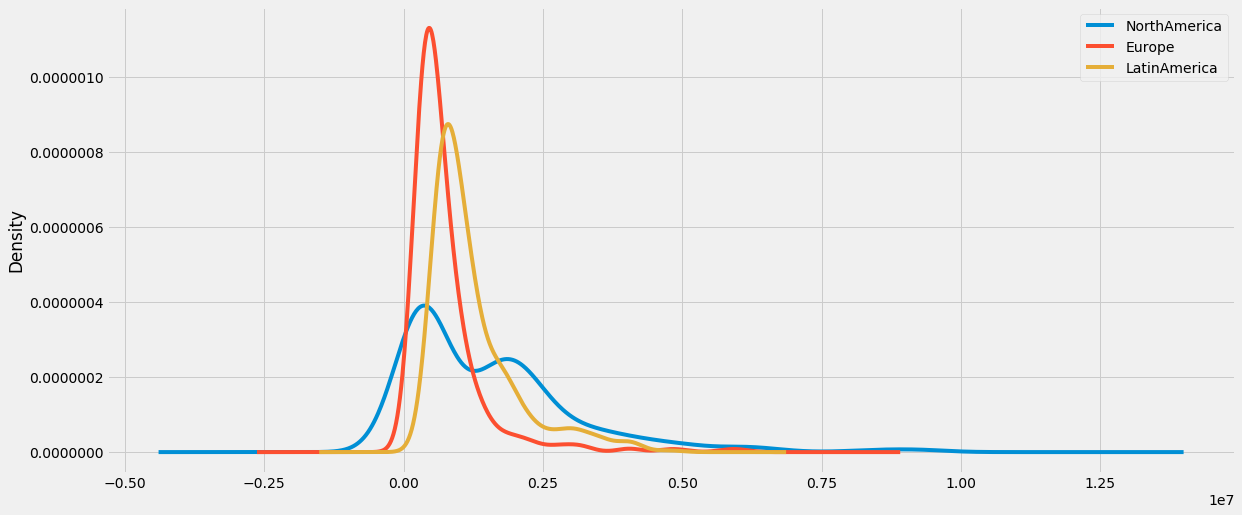

In [242]:
fig, ax = plt.subplots(figsize=(18,8))
classes = list(df.Continent.unique())
for c in classes:
    df2 = df.loc[df['Continent'] == c]
    df2.Streams.plot(kind="kde", ax=ax, label= c)
plt.legend()



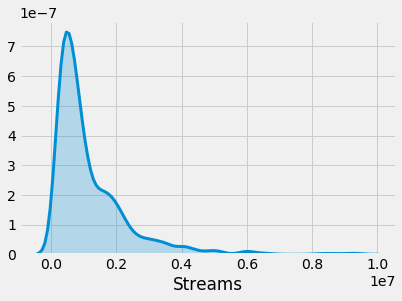

In [230]:
sns.distplot(df['Streams'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

## Group by continent and artist, who has the most streams?

In [309]:
top_by_region = df.groupby(['Continent','Artist'], as_index=False)['Streams'].sum()

Crosstab showed there United States has most number of weekly streams

In [310]:
top_by_region.sort_values('Streams', ascending=False).groupby('Continent').sum()

Streams
Continent              
Europe        297911576
LatinAmerica  433848462
NorthAmerica  619039054

In [311]:
rankbystreams = top_by_region.sort_values('Streams', ascending=False)

In [312]:
rankbystreams.to_csv("rankstreams.csv")

In [313]:
rankbystreams

Continent           Artist   Streams
508  NorthAmerica      Post Malone  53469747
469  NorthAmerica       Kanye West  33805248
12         Europe       Apache 207  30035987
439  NorthAmerica           DaBaby  21542514
136        Europe       RAF Camora  20107271
..            ...              ...       ...
534  NorthAmerica               YG    213435
421  NorthAmerica       Anne-Marie    204628
505  NorthAmerica      OneRepublic    203155
503  NorthAmerica           Offset    201727
456  NorthAmerica  Imagine Dragons    201051

[541 rows x 3 columns]

In [314]:
rankbystreams.groupby(['Continent'])

In [ ]:
# group artists by country 

In [315]:
top_by_country = df.groupby(['Country','Artist'], as_index=False)['Streams'].sum()

In [316]:
top_by_country

Country                      Artist   Streams
0        BR             A Banca Records    695413
1        BR                  ANAVITÓRIA   3401970
2        BR                   Ali Gatie    688103
3        BR                      Anitta   5224350
4        BR               Ariana Grande   1373556
..      ...                         ...       ...
678      US                  Young Thug  16030540
679      US  YoungBoy Never Broke Again   8633181
680      US                        Zedd   2769229
681      US                benny blanco   3398166
682      US                   blackbear   6094241

[683 rows x 3 columns]

In [317]:
top_by_country.sort_values('Streams', ascending=False).groupby('Country').sum()

Streams
Country           
BR       251276325
CA        77701915
DE       197250567
FR       100661009
MX       182572137
US       541337139

In [318]:
rankbystreamscountry = top_by_country.sort_values('Streams', ascending=False)

In [333]:
graphbycountry = rankbystreamscountry.sort_values(['Streams'],ascending=False).groupby('Country').head(2)

In [381]:
graphbycountry

Country            Artist   Streams
654      US       Post Malone  47660279
625      US        Kanye West  30750359
233      DE        Apache 207  30035987
303      DE        RAF Camora  20107271
69       BR  Marília Mendonça  18213433
30       BR     Gusttavo Lima   7100168
506      MX          J Balvin   6401564
375      FR             Gambi   6213757
533      MX            Maluma   6111963
198      CA       Post Malone   5809468
422      FR             Niska   4690827
159      CA        Kanye West   3054889

In [ ]:
# group artists by continent 

In [367]:
graphbycon = top_by_region.sort_values(['Streams'],ascending=False).groupby('Continent').head(2)

In [369]:
graphbycon

Continent            Artist   Streams
508  NorthAmerica       Post Malone  53469747
469  NorthAmerica        Kanye West  33805248
12         Europe        Apache 207  30035987
136        Europe        RAF Camora  20107271
335  LatinAmerica  Marília Mendonça  18213433
264  LatinAmerica     Gusttavo Lima   7100168

In [364]:
graphbycountry


Country            Artist   Streams
654      US       Post Malone  47660279
625      US        Kanye West  30750359
233      DE        Apache 207  30035987
303      DE        RAF Camora  20107271
69       BR  Marília Mendonça  18213433
30       BR     Gusttavo Lima   7100168
506      MX          J Balvin   6401564
375      FR             Gambi   6213757
533      MX            Maluma   6111963
198      CA       Post Malone   5809468
422      FR             Niska   4690827
159      CA        Kanye West   3054889

Text(0.5, 0, 'Number of Streams Weekly')

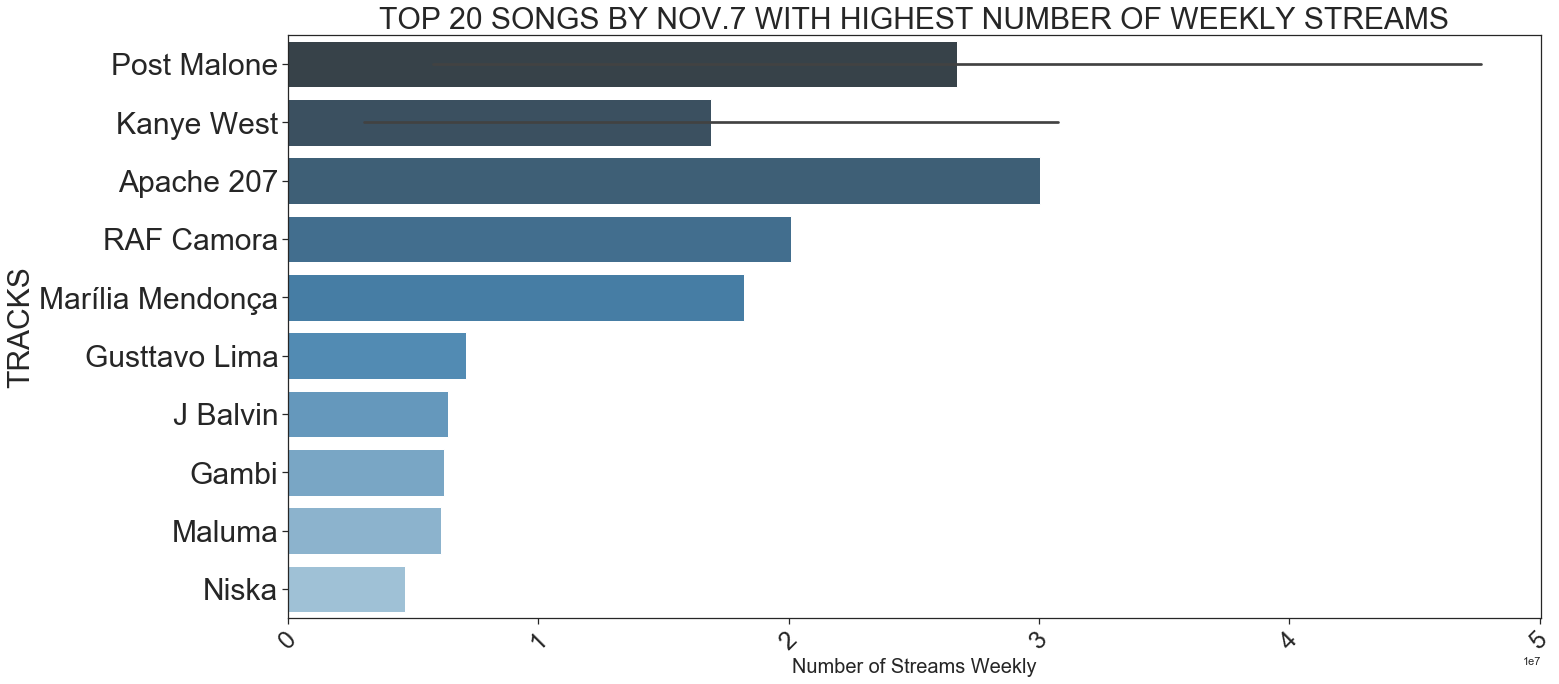

In [386]:
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.barplot(x = 'Streams', y = 'Artist', data = graphbycountry,palette=("Blues_d"))
plt.title('TOP 20 SONGS BY NOV.7 WITH HIGHEST NUMBER OF WEEKLY STREAMS', size = 30)
plt.yticks(size = 30)
plt.xticks(rotation=45, size = 25)
plt.ylabel(ylabel = 'TRACKS',size = 30)
plt.xlabel(xlabel = 'Number of Streams Weekly',size = 20)

In [5]:
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
client_id = ''  # type in the client id
client_secret = '' # type in the client secret id
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

Spotipy webapi is useful when your major interests are about the artists. search function to get the artist information.

# Extracting artist name and put them into list of dictionary

# FUNCTION TO GET ALBUM INFORMATION 

In [50]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
#Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

# Songs features 

In [52]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [ ]:
# GET ALBUM INFORMATION

In [53]:

sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 16.68065905570984 seconds


#put all of those albums into dictionary

In [54]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

107

#put each artist into dataframe

#put all three artists into frames and concat them into one single dataframe

In [61]:
frames = (post,marillia,apache401)
newdf = pd.concat(frames)

In [116]:
newdf.to_csv("df.csv")

#Manova

MANOVA test on artist- on their song attributes

In [67]:
maov = MANOVA.from_formula('acousticness+danceability+energy+instrumentalness+liveness+\
                        loudness+speechiness+tempo+valence+popularity ~ Artist', data=newdf)

In [214]:
print(maov.mv_test())

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0108 10.0000 521.0000 4787.8365 0.0000
         Pillai's trace  0.9892 10.0000 521.0000 4787.8365 0.0000
 Hotelling-Lawley trace 91.8971 10.0000 521.0000 4787.8365 0.0000
    Roy's greatest root 91.8971 10.0000 521.0000 4787.8365 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
           Artist         Value   Num DF   Den DF  F Value Pr > F
-----------------------------------------------------------------
            Wilks' lambda 0.2568 20.0000 1042.0000 50.7017 0.0000
           Pillai's trace 0.97

In [69]:
print(maov.mv_test())
esq_sm = table['sum_sq'][0]/(table['sum_sq'][0]+table['sum_sq'][1])

table['EtaSq'] = [esq_sm, 'NaN']

print(table)


                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0108 10.0000 521.0000 4787.8365 0.0000
         Pillai's trace  0.9892 10.0000 521.0000 4787.8365 0.0000
 Hotelling-Lawley trace 91.8971 10.0000 521.0000 4787.8365 0.0000
    Roy's greatest root 91.8971 10.0000 521.0000 4787.8365 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
           Artist         Value   Num DF   Den DF  F Value Pr > F
-----------------------------------------------------------------
            Wilks' lambda 0.2568 20.0000 1042.0000 50.7017 0.0000
           Pillai's trace 0.97

In [ ]:
#partial eta square for MANOVA

In [215]:
partialetasquared = (20*50.7) / (20*50.7 +1042*50.7)

In [216]:
print(partialetasquared)

0.018832391713747645


In [ ]:
#One Way Between Group ANOVA- artists with three levels on all song attributes

In [75]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_acousticness = ols('acousticness~ Artist',data=newdf).fit()
anova_acousticness.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acousticness   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     26.29
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           1.31e-11
Time:                        21:28:44   Log-Likelihood:                 35.876
No. Observations:                 533   AIC:                            -65.75
Df Residuals:                     530   BIC:                            -52.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1816      0.013     13.680      0.000       0.156       0.208
Artist[T.PostMalone]     0.1264      0.024      5.342      0.000       0.080       0.173
Artist[T.marillia]       0.1600      0.026      6.243      0.000       0.110       0.210
==============================================================================
Omnibus:                      113.914   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.171
Skew:                           1.322   Prob(JB):                     5.07e-42
Kurtosis:                       4.252   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
anova_valence = ols('valence~ Artist',data=newdf).fit()
anova_valence.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     124.4
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           5.24e-45
Time:                        10:00:44   Log-Likelihood:                 110.14
No. Observations:                 533   AIC:                            -214.3
Df Residuals:                     530   BIC:                            -201.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5806      0.012     50.276      0.000       0.558       0.603
Artist[T.PostMalone]    -0.2344      0.021    -11.381      0.000      -0.275      -0.194
Artist[T.marillia]       0.1593      0.022      7.141      0.000       0.115       0.203
==============================================================================
Omnibus:                       11.181   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.593
Skew:                          -0.309   Prob(JB):                      0.00304
Kurtosis:                       3.373   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
import scipy.stats as stats
stats.f_oneway(newdf['valence'],newdf['loudness'],newdf['popularity'])


F_onewayResult(statistic=2828.0273117056427, pvalue=0.0)

In [63]:
## Connect to DB server on AWS
import mysql.connector 
from mysql.connector import errorcode
import config
## Connecting to the database
## connecting to the database using 'connect()' method
## it takes 3 required parameters 'host', 'user', 'passwd'
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password
)

In [15]:
cursor = cnx.cursor()

In [17]:
## Create new DB 
db_name = 'mod3'
def create_database(cursor, database):
    try:
        cursor.execute(
            "CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(database))
    except mysql.connector.Error as err:
        print("Failed creating database: {}".format(err))
        exit(1)
        
    #above is python code that is going to connect to SQL queries w/ cursor.execute
    #cursor knows to take SQL query and send it to server to run code
    #try & except is error handling within python
    #format takes in database and tries to run it
    #if failed, except will tell you error and why it failed
    #above is a function to create a database

try:
    cursor.execute("USE {}".format(db_name))
except mysql.connector.Error as err:
    print("Database {} does not exists.".format(db_name))
    if err.errno == errorcode.ER_BAD_DB_ERROR:
        create_database(cursor, db_name)
        print("Database {} created successfully.".format(db_name))
        cnx.database = db_name####
    else:
        print(err)
        exit(1)

In [ ]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

In [82]:
newdf

album  track_number  \
0                            Hollywood's Bleeding             1   
1                            Hollywood's Bleeding             2   
2                            Hollywood's Bleeding             3   
3                            Hollywood's Bleeding             4   
4                            Hollywood's Bleeding             5   
..                                            ...           ...   
287  A.I.D.S. - Alles ist die Sekte - Album Nr. 3            24   
288  A.I.D.S. - Alles ist die Sekte - Album Nr. 3            25   
289  A.I.D.S. - Alles ist die Sekte - Album Nr. 3            26   
290  A.I.D.S. - Alles ist die Sekte - Album Nr. 3            27   
291  A.I.D.S. - Alles ist die Sekte - Album Nr. 3            28   

                         id  \
0    7sWRlDoTDX8geTR8zzr2vt   
1    05mDaV9Vb3wrzjF6OPZnhq   
2    0Xek5rqai2jcOWCYWJfVCF   
3    1YscJ7yVTlFxW3eF6pv5ba   
4    2J0NXdHr6MYvKDSxB7k3V2   
..                      ...   
287  3nXcBNxil02X0gLl7LBncc   
288  3FTPoPH3WG3ncTq7sYVdAe   
289  1MLVTgF5gRXXgNiP0OJG2S   
290  1XMTzMPoQ5Qmxl65qQEocv   
291  6PdWk4nO4Gp4AFumgg3IK6   

                                                  name  \
0                                 Hollywood's Bleeding   
1                                         Saint-Tropez   
2                               Enemies (feat. DaBaby)   
3                                             Allergic   
4                                 A Thousand Bad Times   
..                                                 ...   
287                                          Nachm Gig   
288  G's & B's (Open Mic) [feat. Mesut, Atilla & Cipo]   
289                                     Opfermix Nr. 3   
290                              Skit 2 - Instrumental   
291                         Alle Frauen sind Schlampen   

                                      uri  acousticness  danceability  energy  \
0    spotify:track:7sWRlDoTDX8geTR8zzr2vt        0.3310         0.405   0.646   
1    spotify:track:05mDaV9Vb3wrzjF6OPZnhq        0.0545         0.617   0.684   
2    spotify:track:0Xek5rqai2jcOWCYWJfVCF        0.0588         0.542   0.674   
3    spotify:track:1YscJ7yVTlFxW3eF6pv5ba        0.1540         0.665   0.741   
4    spotify:track:2J0NXdHr6MYvKDSxB7k3V2        0.1050         0.632   0.732   
..                                    ...           ...           ...     ...   
287  spotify:track:3nXcBNxil02X0gLl7LBncc        0.4280         0.715   0.227   
288  spotify:track:3FTPoPH3WG3ncTq7sYVdAe        0.0485         0.809   0.683   
289  spotify:track:1MLVTgF5gRXXgNiP0OJG2S        0.4510         0.638   0.849   
290  spotify:track:1XMTzMPoQ5Qmxl65qQEocv        0.6080         0.697   0.255   
291  spotify:track:6PdWk4nO4Gp4AFumgg3IK6        0.2050         0.803   0.547   

     instrumentalness  liveness  loudness  speechiness    tempo  valence  \
0            0.000000    0.1030    -3.206       0.0476  130.218    0.170   
1            0.000000    0.1040    -3.618       0.0439  132.113    0.295   
2            0.000000    0.0955    -4.169       0.2100   76.388    0.667   
3            0.000030    0.3450    -3.694       0.0787  144.968    0.570   
4            0.000012    0.1110    -3.498       0.0920  159.000    0.317   
..                ...       ...       ...          ...      ...      ...   
287          0.000000    0.9590   -16.822       0.9310   91.716    0.846   
288          0.000000    0.6900    -7.045       0.4990   91.309    0.696   
289          0.000000    0.0956    -3.478       0.4140  140.652    0.723   
290          0.940000    0.1020   -12.064       0.3230  184.016    0.577   
291          0.000000    0.1020    -7.665       0.3950   95.088    0.736   

     popularity      Artist  
0            89  PostMalone  
1            91  PostMalone  
2            89  PostMalone  
3            83  PostMalone  
4            84  PostMalone  
..          ...         ...  
287          17   Apache401  
288          17   Apache401  
289          

In [109]:
newdf['Artist'].unique()

array(['PostMalone', 'marillia', 'Apache401'], dtype=object)

<IPython.core.display.Javascript object>


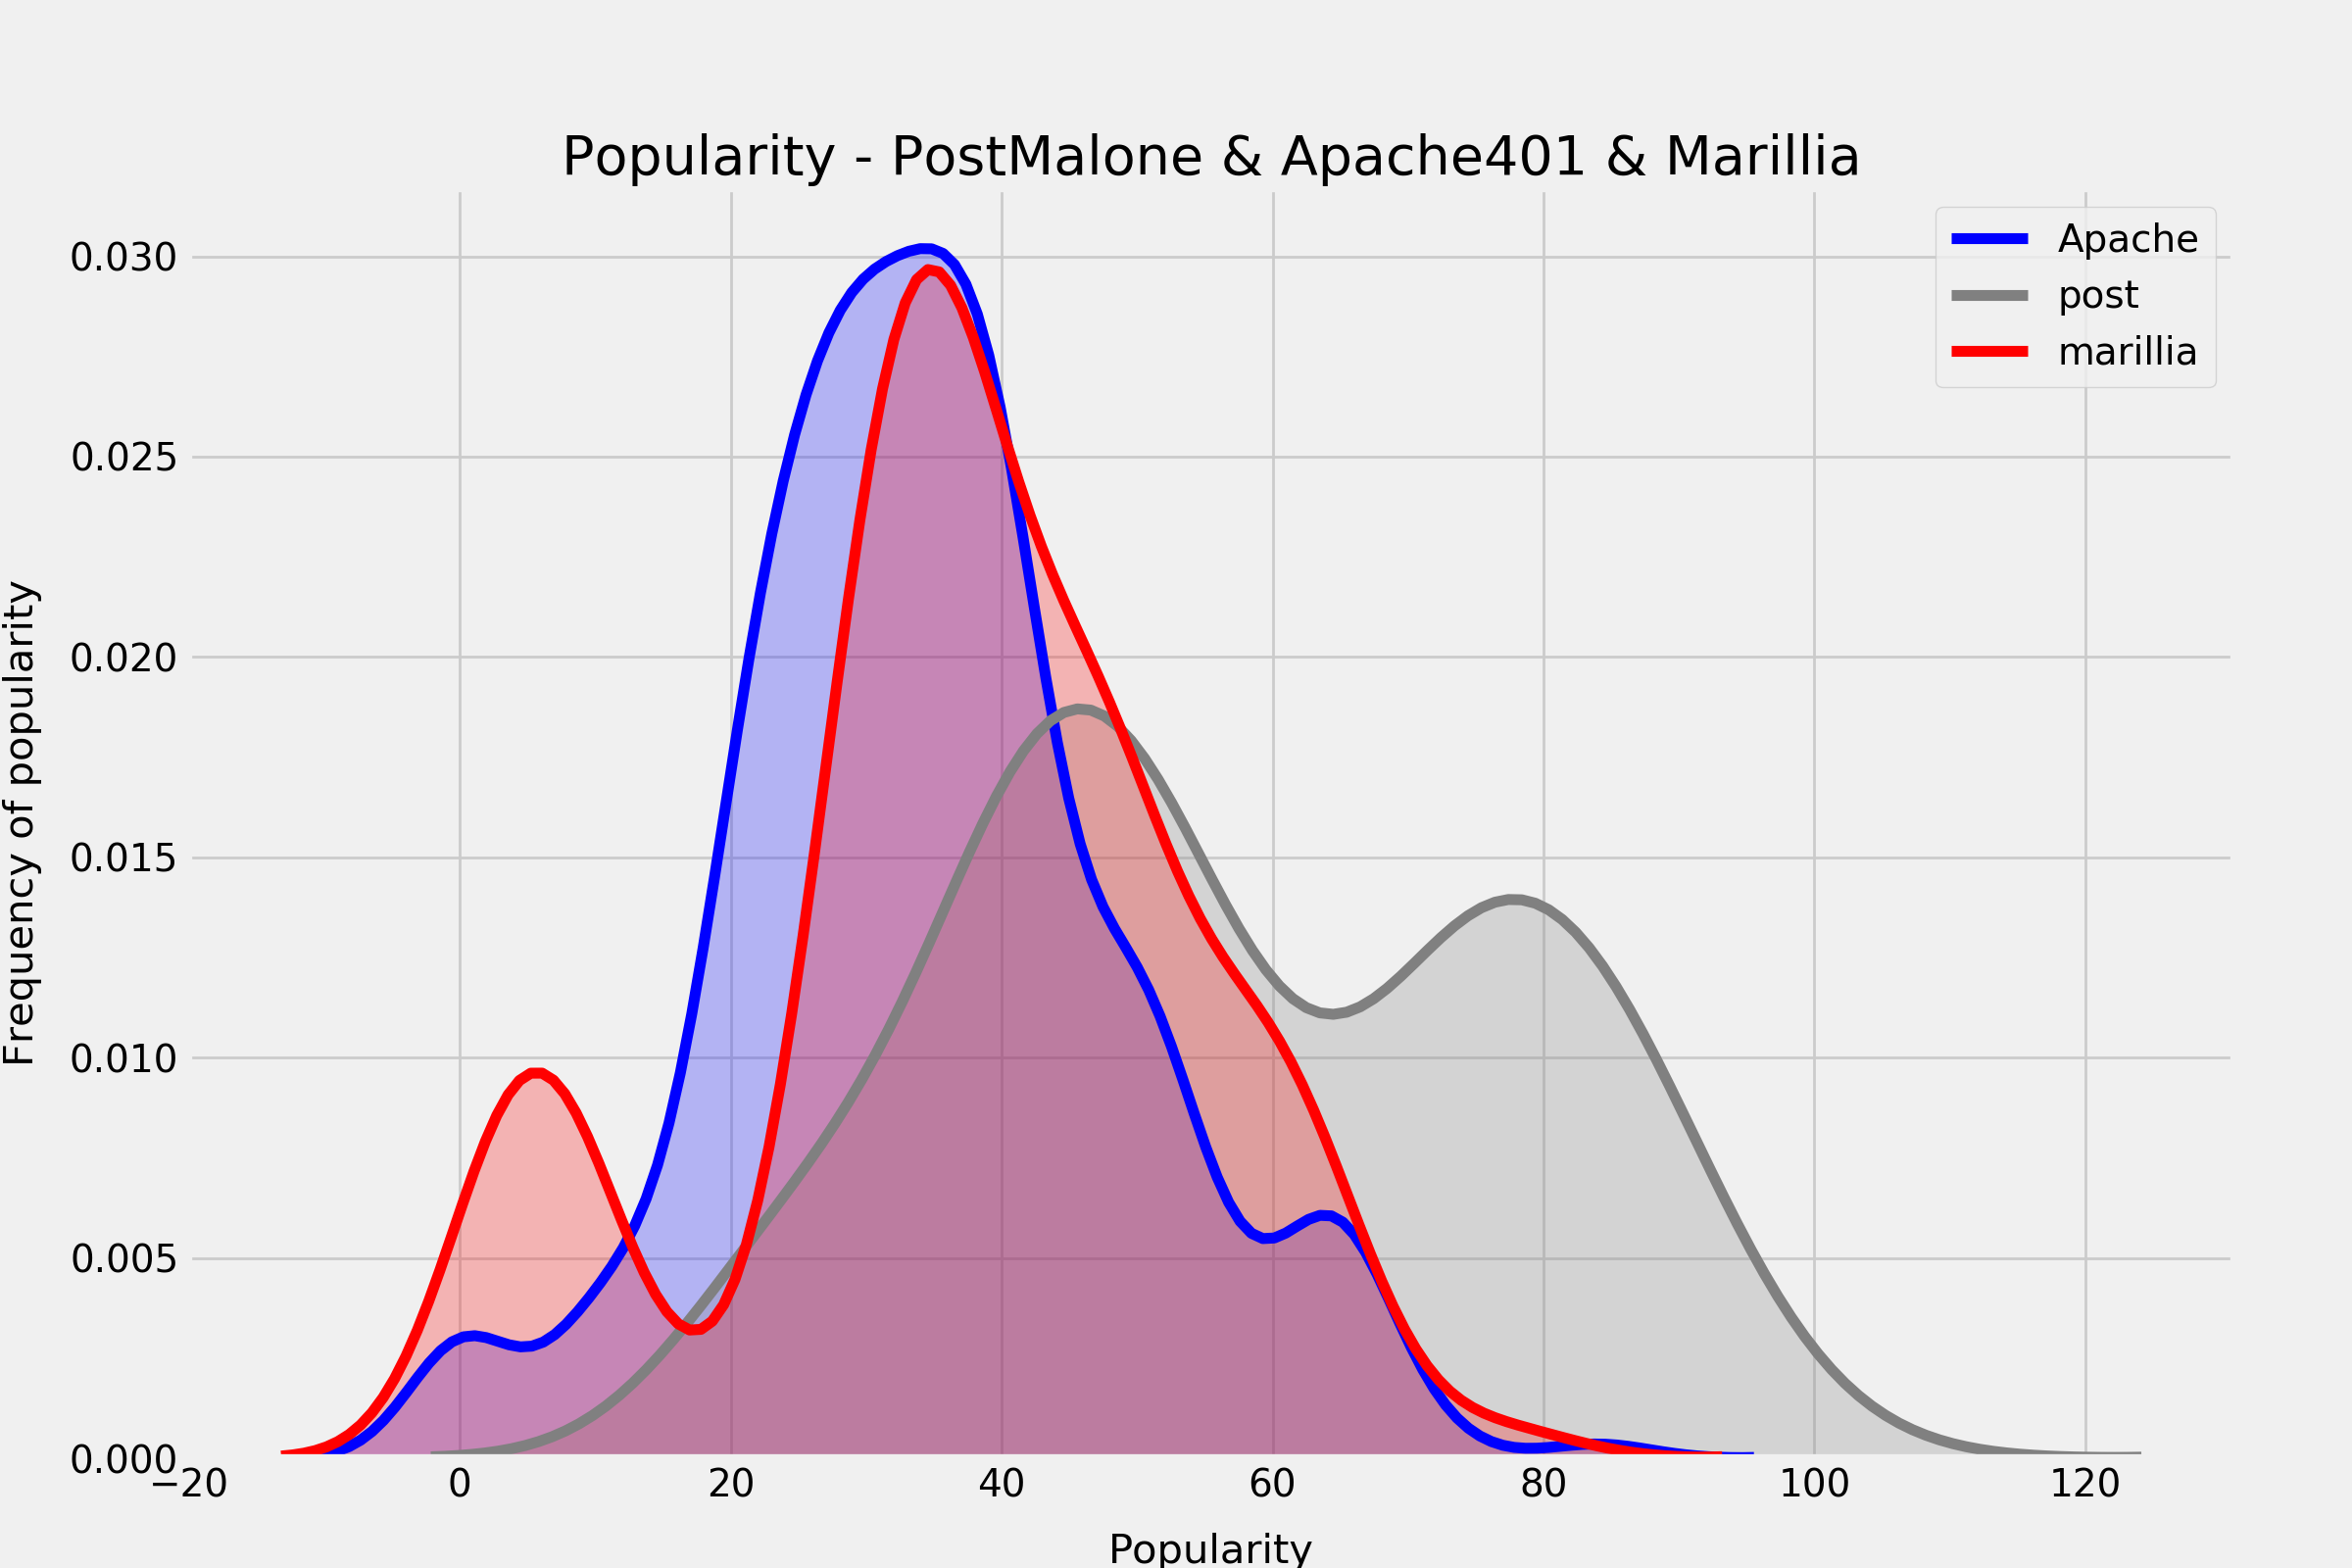

In [123]:
# Kernel Density Plot
fig = plt.figure(figsize=(12,8))
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == 'Apache401' ),'popularity'] , color='blue',shade=True,label='Apache')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "PostMalone"),'popularity'] , color='gray',shade=True, label='post')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "marillia"),'popularity'] , color='red',shade=True, label='Marília Mendonça')


plt.title('Popularity - PostMalone & Apache401 & Marília Mendonça', fontsize = 20, pad = 5)
plt.ylabel("Frequency of popularity", fontsize = 15, labelpad = 10)
plt.xlabel("Popularity", fontsize = 15, labelpad = 10);

<IPython.core.display.Javascript object>


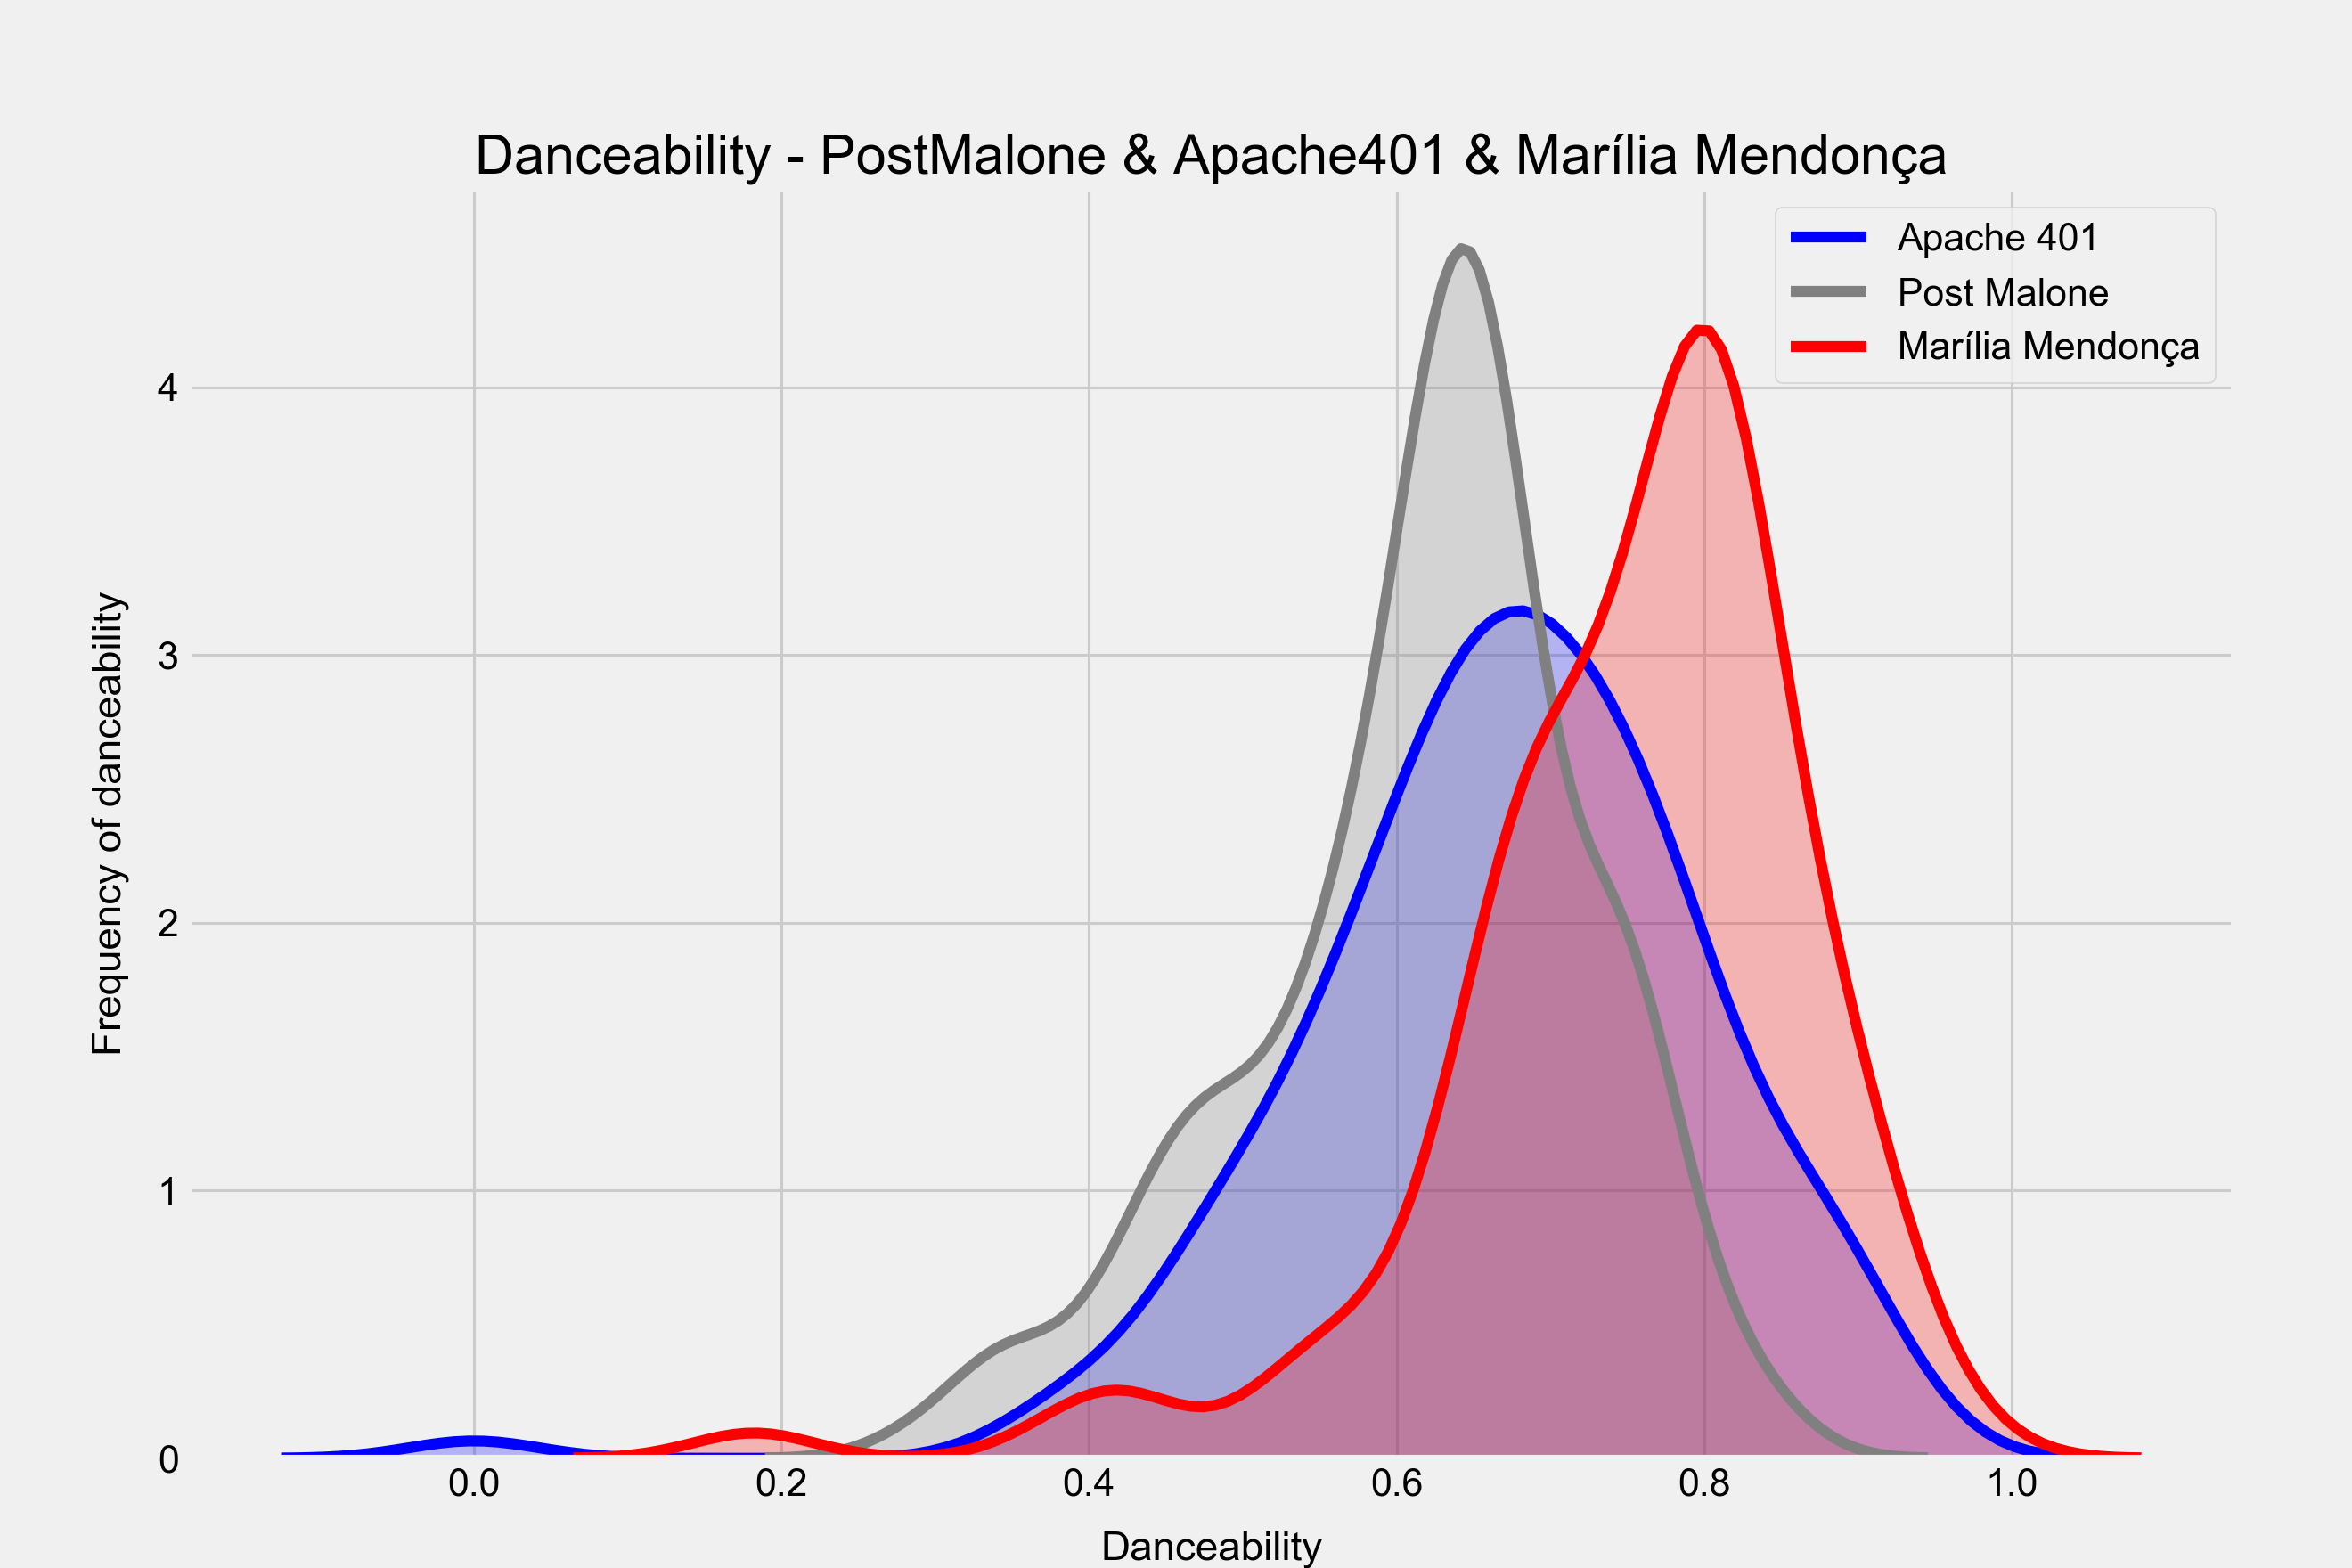

In [187]:
fig = plt.figure(figsize=(12,8))
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == 'Apache401' ),'danceability'] , color='blue',shade=True,label='Apache 401')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "PostMalone"),'danceability'] , color='gray',shade=True, label='Post Malone')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "marillia"),'danceability'] , color='red',shade=True, label='Marília Mendonça')

plt.title('Danceability - PostMalone & Apache401 & Marília Mendonça' , fontsize = 20, pad = 5)
plt.ylabel("Frequency of danceability", fontsize = 15, labelpad = 10)
plt.xlabel("Danceability", fontsize = 15, labelpad = 10);

In [204]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'valence ~ C(Artist)'
lm = ols(formula, newdf).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

              sum_sq     df           F        PR(>F)
C(Artist)   9.686613    2.0  124.351421  5.243112e-45
Residual   20.642727  530.0         NaN           NaN


In [206]:
esq_sm = table['sum_sq'][0]/(table['sum_sq'][0]+table['sum_sq'][1])

table['EtaSq'] = [esq_sm, 'NaN']

print(table)

              sum_sq     df           F        PR(>F)     EtaSq
C(Artist)   9.686613    2.0  124.351421  5.243112e-45  0.319381
Residual   20.642727  530.0         NaN           NaN       NaN


In [208]:
import pingouin as pg

In [210]:
pg.pairwise_tukey(dv='valence', between='Artist', effsize='cohen', data = newdf)

A           B  mean(A)  mean(B)   diff     se       tail       T  \
0   Apache401  PostMalone    0.581    0.346  0.234  0.021  two-sided  11.373   
1   Apache401    marillia    0.581    0.740 -0.159  0.022  two-sided  -7.137   
2  PostMalone    marillia    0.346    0.740 -0.394  0.026  two-sided -15.374   

   p-tukey  cohen  
0    0.001  1.187  
1    0.001 -0.806  
2    0.001 -1.993

In [218]:
pg.pairwise_tukey(dv='danceability', between='Artist', effsize='cohen', data = newdf)

A           B  mean(A)  mean(B)   diff     se       tail      T  \
0   Apache401  PostMalone    0.671    0.616  0.055  0.013  two-sided  4.276   
1   Apache401    marillia    0.671    0.751 -0.080  0.014  two-sided -5.779   
2  PostMalone    marillia    0.616    0.751 -0.135  0.016  two-sided -8.479   

   p-tukey  cohen  
0    0.001  0.446  
1    0.001 -0.653  
2    0.001 -1.099

In [219]:
pg.pairwise_tukey(dv='popularity', between='Artist', effsize='cohen', data = newdf)

A           B  mean(A)  mean(B)    diff     se       tail       T  \
0   Apache401  PostMalone   34.740   57.381 -22.641  1.722  two-sided -13.150   
1   Apache401    marillia   34.740   36.888  -2.148  1.865  two-sided  -1.152   
2  PostMalone    marillia   57.381   36.888  20.493  2.139  two-sided   9.579   

    p-tukey  cohen  
0  0.001000 -1.372  
1  0.483681 -0.130  
2  0.001000  1.242

In [221]:
anova_popularity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     90.35
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           1.73e-34
Time:                        09:36:11   Log-Likelihood:                -2249.0
No. Observations:                 533   AIC:                             4504.
Df Residuals:                     530   BIC:                             4517.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               34.7397      0.966     35.976      0.000      32.843      36.637
Artist[T.PostMalone]    22.6409      1.722     13.150      0.000      19.259      26.023
Artist[T.marillia]       2.1481      1.865      1.152      0.250      -1.515       5.811
==============================================================================
Omnibus:                        1.371   Durbin-Watson:                   0.485
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.394
Skew:                           0.066   Prob(JB):                        0.498
Kurtosis:                       2.787   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
anova_valence = ols('valence~ Artist',data=newdf).fit()
anova_valence.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     124.4
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           5.24e-45
Time:                        10:07:10   Log-Likelihood:                 110.14
No. Observations:                 533   AIC:                            -214.3
Df Residuals:                     530   BIC:                            -201.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5806      0.012     50.276      0.000       0.558       0.603
Artist[T.PostMalone]    -0.2344      0.021    -11.381      0.000      -0.275      -0.194
Artist[T.marillia]       0.1593      0.022      7.141      0.000       0.115       0.203
==============================================================================
Omnibus:                       11.181   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.593
Skew:                          -0.309   Prob(JB):                      0.00304
Kurtosis:                       3.373   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
pg.pairwise_tukey(dv='valence', between='Artist', effsize='cohen', data = newdf)

A           B  mean(A)  mean(B)   diff     se       tail       T  \
0   Apache401  PostMalone    0.581    0.346  0.234  0.021  two-sided  11.373   
1   Apache401    marillia    0.581    0.740 -0.159  0.022  two-sided  -7.137   
2  PostMalone    marillia    0.346    0.740 -0.394  0.026  two-sided -15.374   

   p-tukey  cohen  
0    0.001  1.187  
1    0.001 -0.806  
2    0.001 -1.993

In [224]:
anova_tempo = ols('tempo ~ Artist',data=newdf).fit()
anova_tempo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  tempo   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     15.84
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           2.08e-07
Time:                        10:25:20   Log-Likelihood:                -2628.6
No. Observations:                 533   AIC:                             5263.
Df Residuals:                     530   BIC:                             5276.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              109.9251      1.968     55.843      0.000     106.058     113.792
Artist[T.PostMalone]    12.8394      3.510      3.658      0.000       5.945      19.734
Artist[T.marillia]      19.5967      3.801      5.155      0.000      12.129      27.064
==============================================================================
Omnibus:                       24.748   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.364
Skew:                           0.549   Prob(JB):                     1.14e-06
Kurtosis:                       2.832   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
pg.pairwise_tukey(dv='tempo', between='Artist', effsize='cohen', data = newdf)

A           B  mean(A)  mean(B)    diff     se       tail      T  \
0   Apache401  PostMalone  109.925  122.764 -12.839  3.510  two-sided -3.658   
1   Apache401    marillia  109.925  129.522 -19.597  3.801  two-sided -5.155   
2  PostMalone    marillia  122.764  129.522  -6.757  4.361  two-sided -1.549   

    p-tukey  cohen  
0  0.001000 -0.382  
1  0.001000 -0.583  
2  0.268426 -0.201

<IPython.core.display.Javascript object>


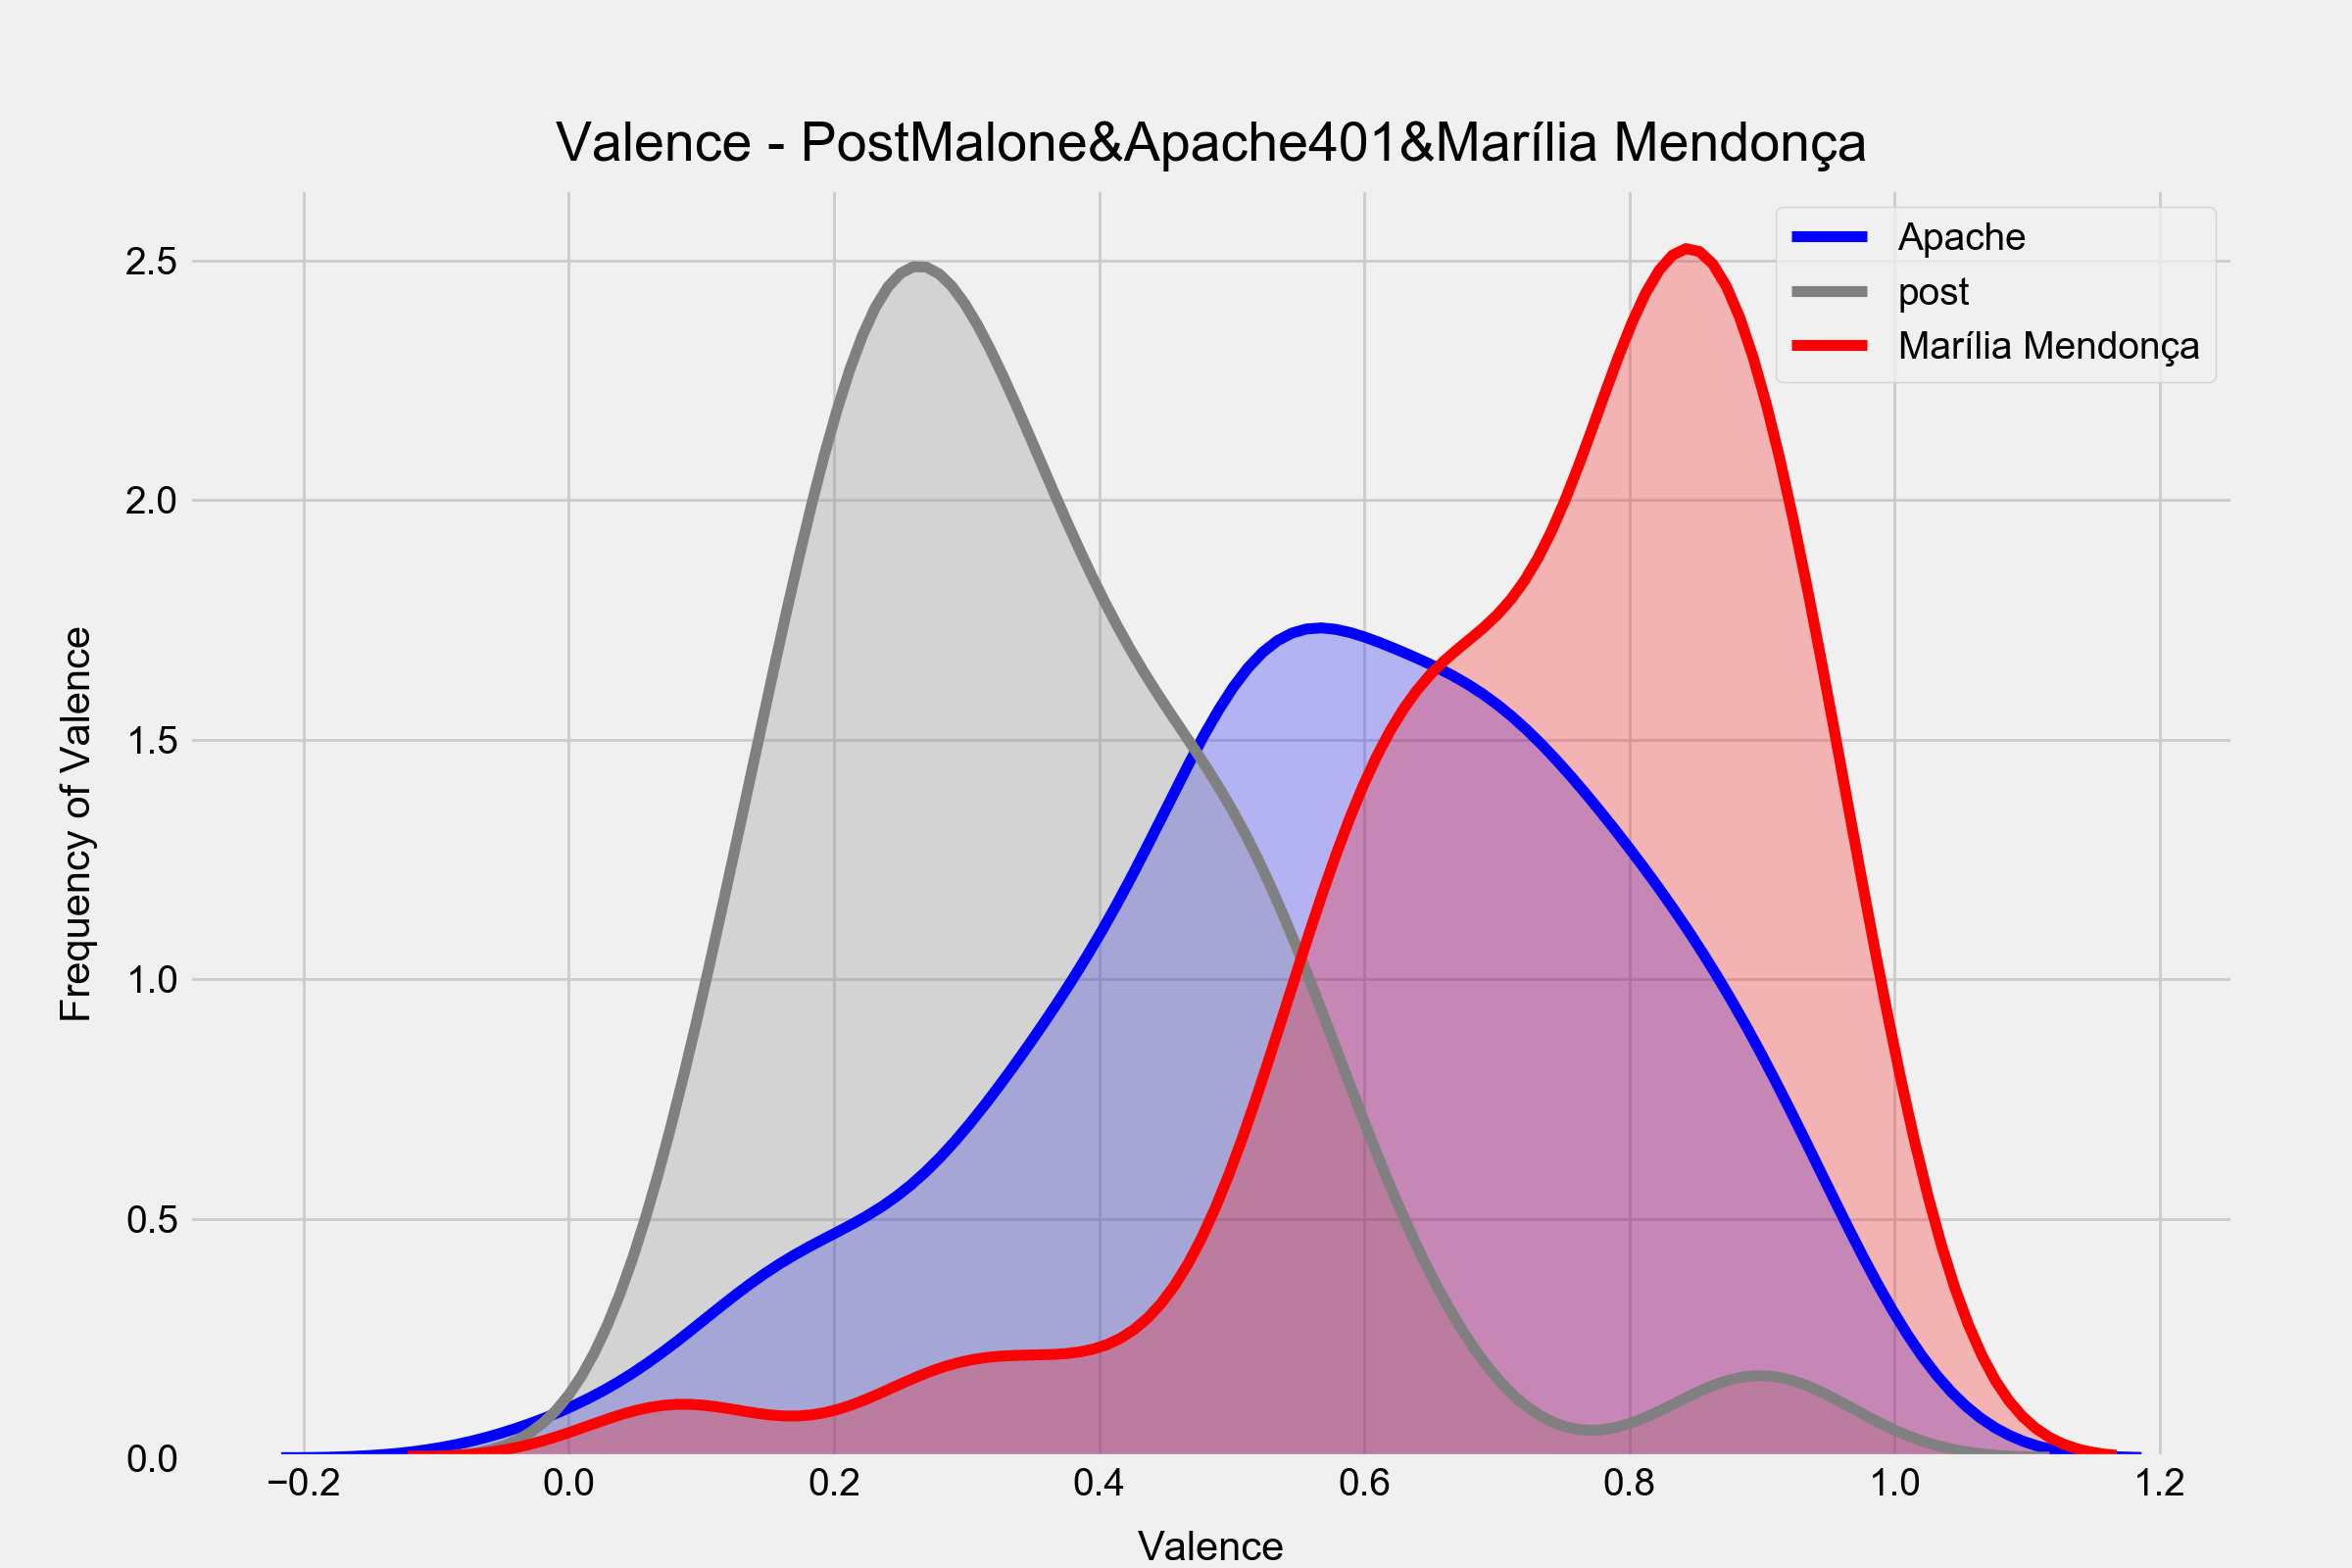

In [175]:
# Kernel Density Plot
fig = plt.figure(figsize=(12,8),)
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == 'Apache401' ),'valence'] , color='blue',shade=True,label='Apache')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "PostMalone"),'valence'] , color='gray',shade=True, label='post')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "marillia"),'valence'] , color='red',shade=True, label='Marília Mendonça')

plt.title('Valence - PostMalone&Apache401&Marília Mendonça', fontsize = 20, pad = 10)
plt.ylabel("Frequency of Valence", fontsize = 15, labelpad = 10)
plt.xlabel("Valence", fontsize = 15, labelpad = 10);

<IPython.core.display.Javascript object>


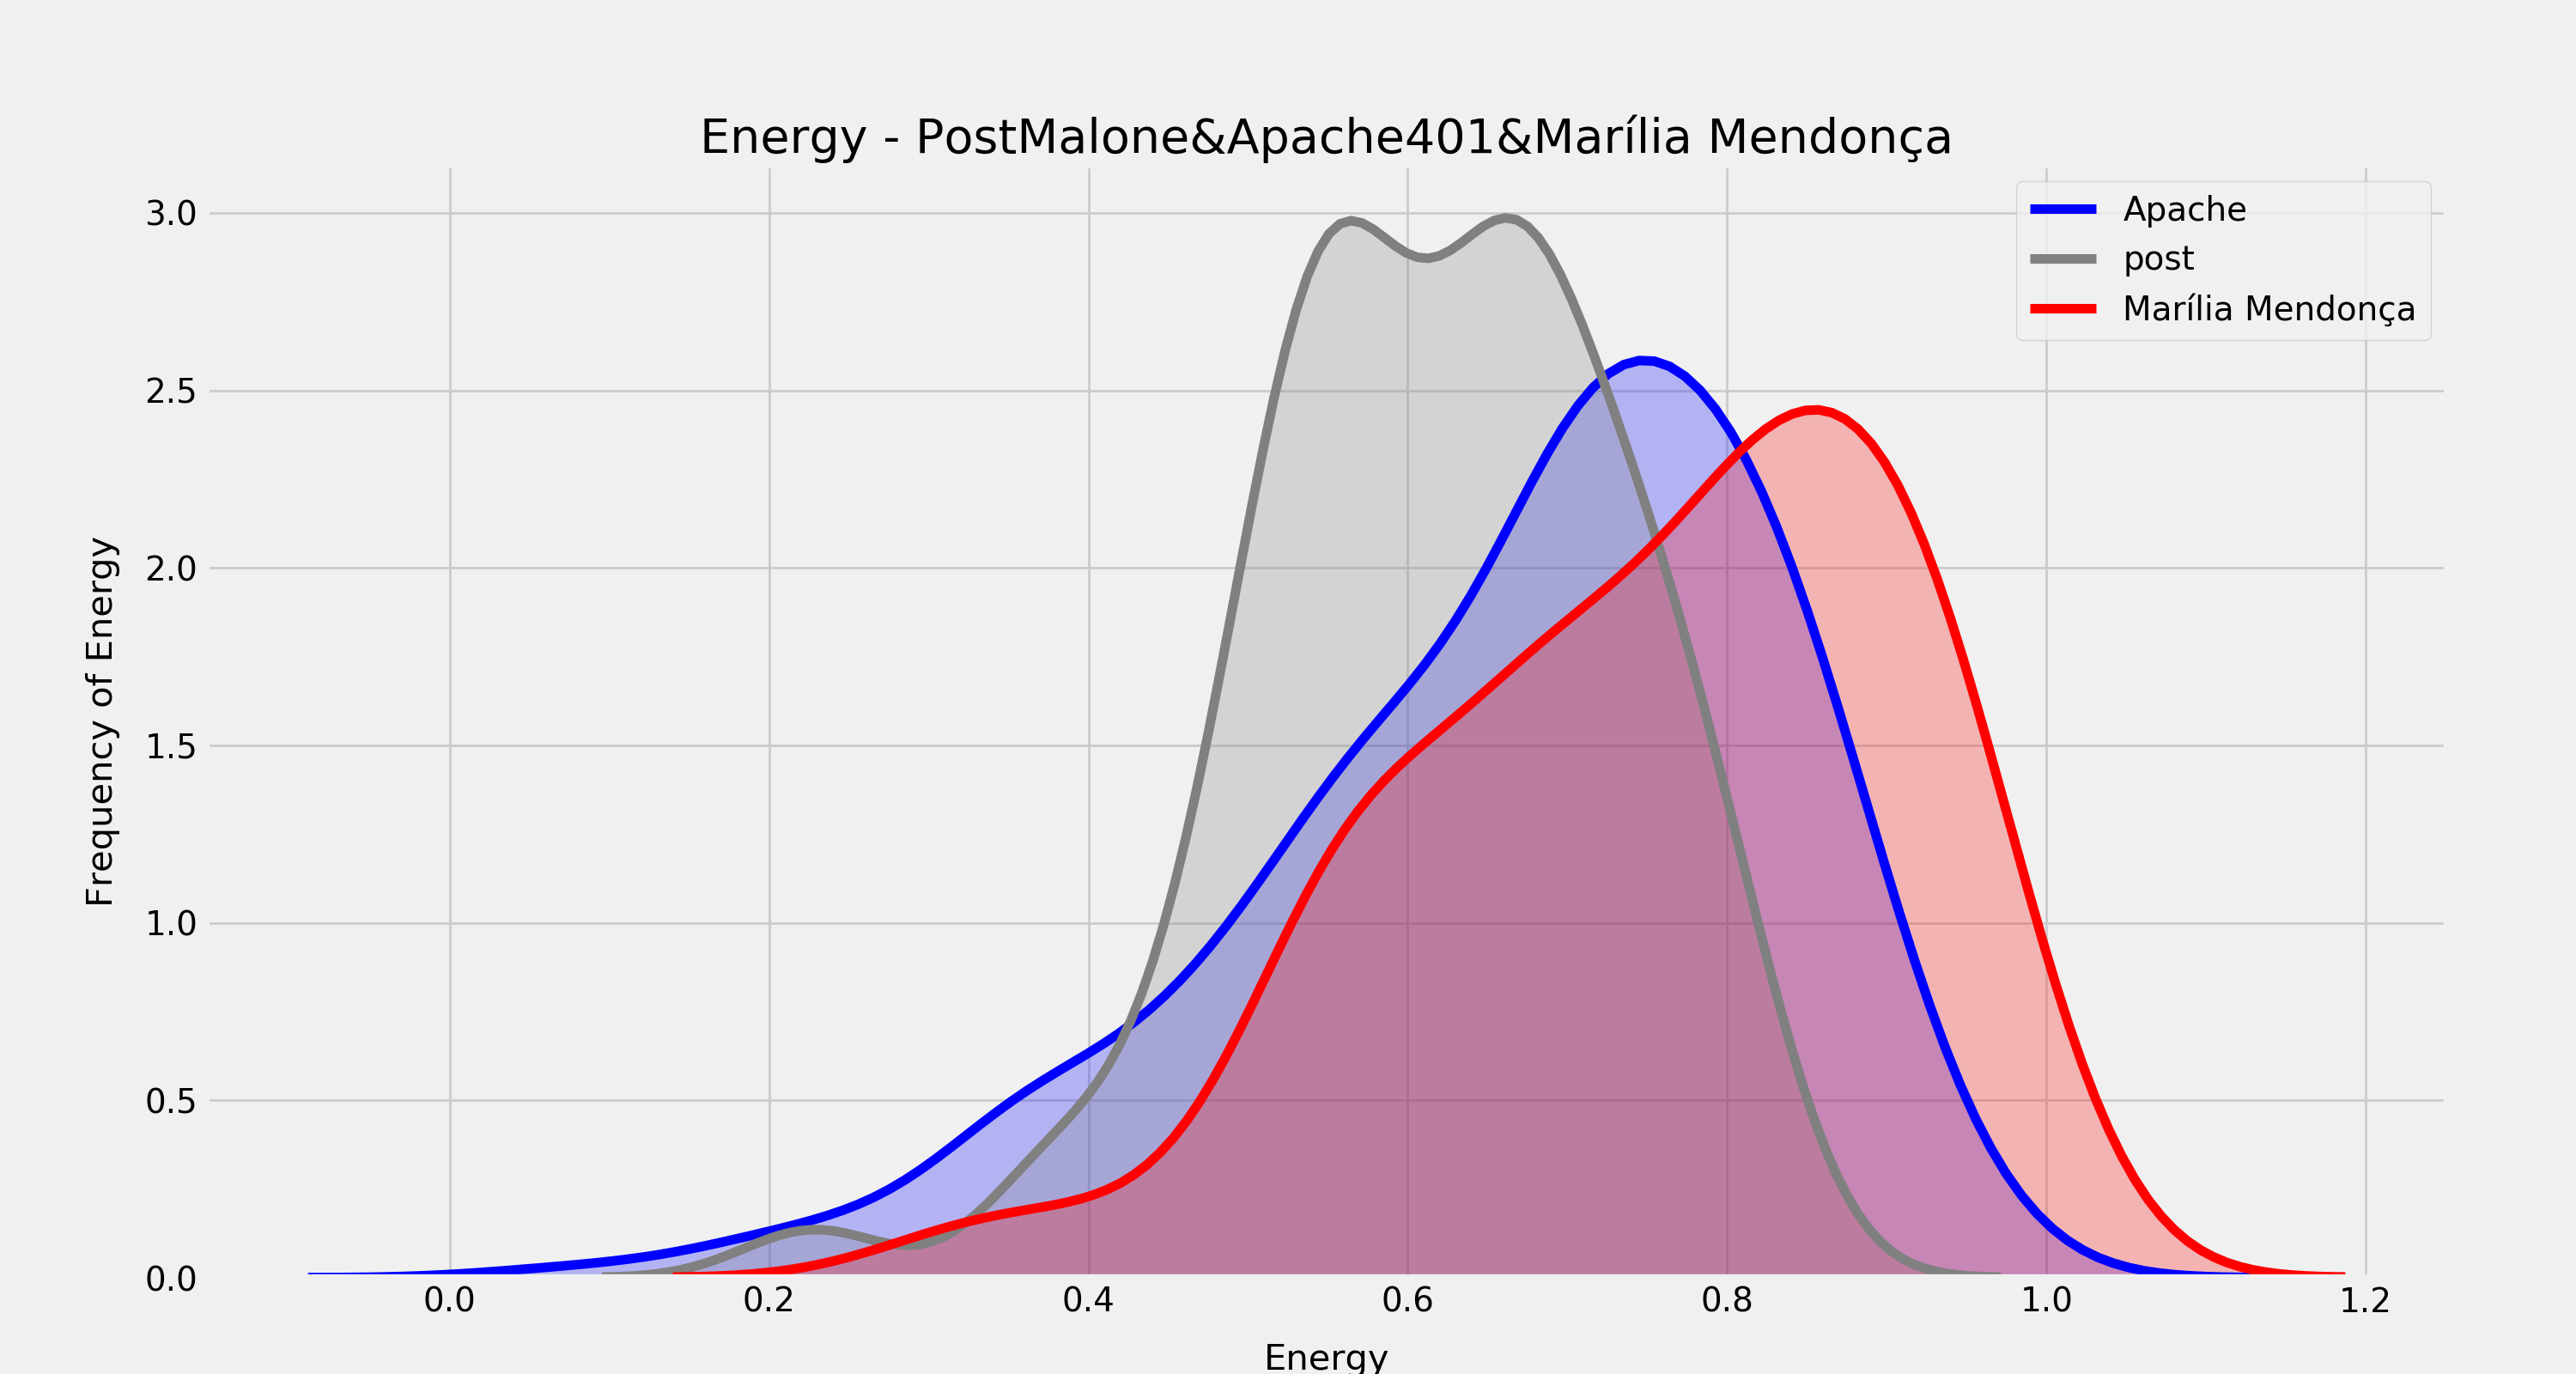

In [176]:
# Valence Density Plot
fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == 'Apache401' ),'energy'] , color='blue',shade=True,label='Apache')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "PostMalone"),'energy'] , color='gray',shade=True, label='post')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "marillia"),'energy'] , color='red',shade=True, label='Marília Mendonça')

plt.title('Energy - PostMalone&Apache401&Marília Mendonça', fontsize = 20, pad = 5)
plt.ylabel("Frequency of Energy", fontsize = 15, labelpad = 10)
plt.xlabel("Energy", fontsize = 15, labelpad = 10);

In [126]:
anova_energy = ols('energy~ Artist',data=newdf).fit()
anova_energy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     25.38
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           2.99e-11
Time:                        10:07:28   Log-Likelihood:                 254.18
No. Observations:                 533   AIC:                            -502.4
Df Residuals:                     530   BIC:                            -489.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6716      0.009     76.190      0.000       0.654       0.689
Artist[T.PostMalone]    -0.0536      0.016     -3.412      0.001      -0.084      -0.023
Artist[T.marillia]       0.0850      0.017      4.994      0.000       0.052       0.118
==============================================================================
Omnibus:                       47.847   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.383
Skew:                          -0.771   Prob(JB):                     2.10e-13
Kurtosis:                       3.499   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


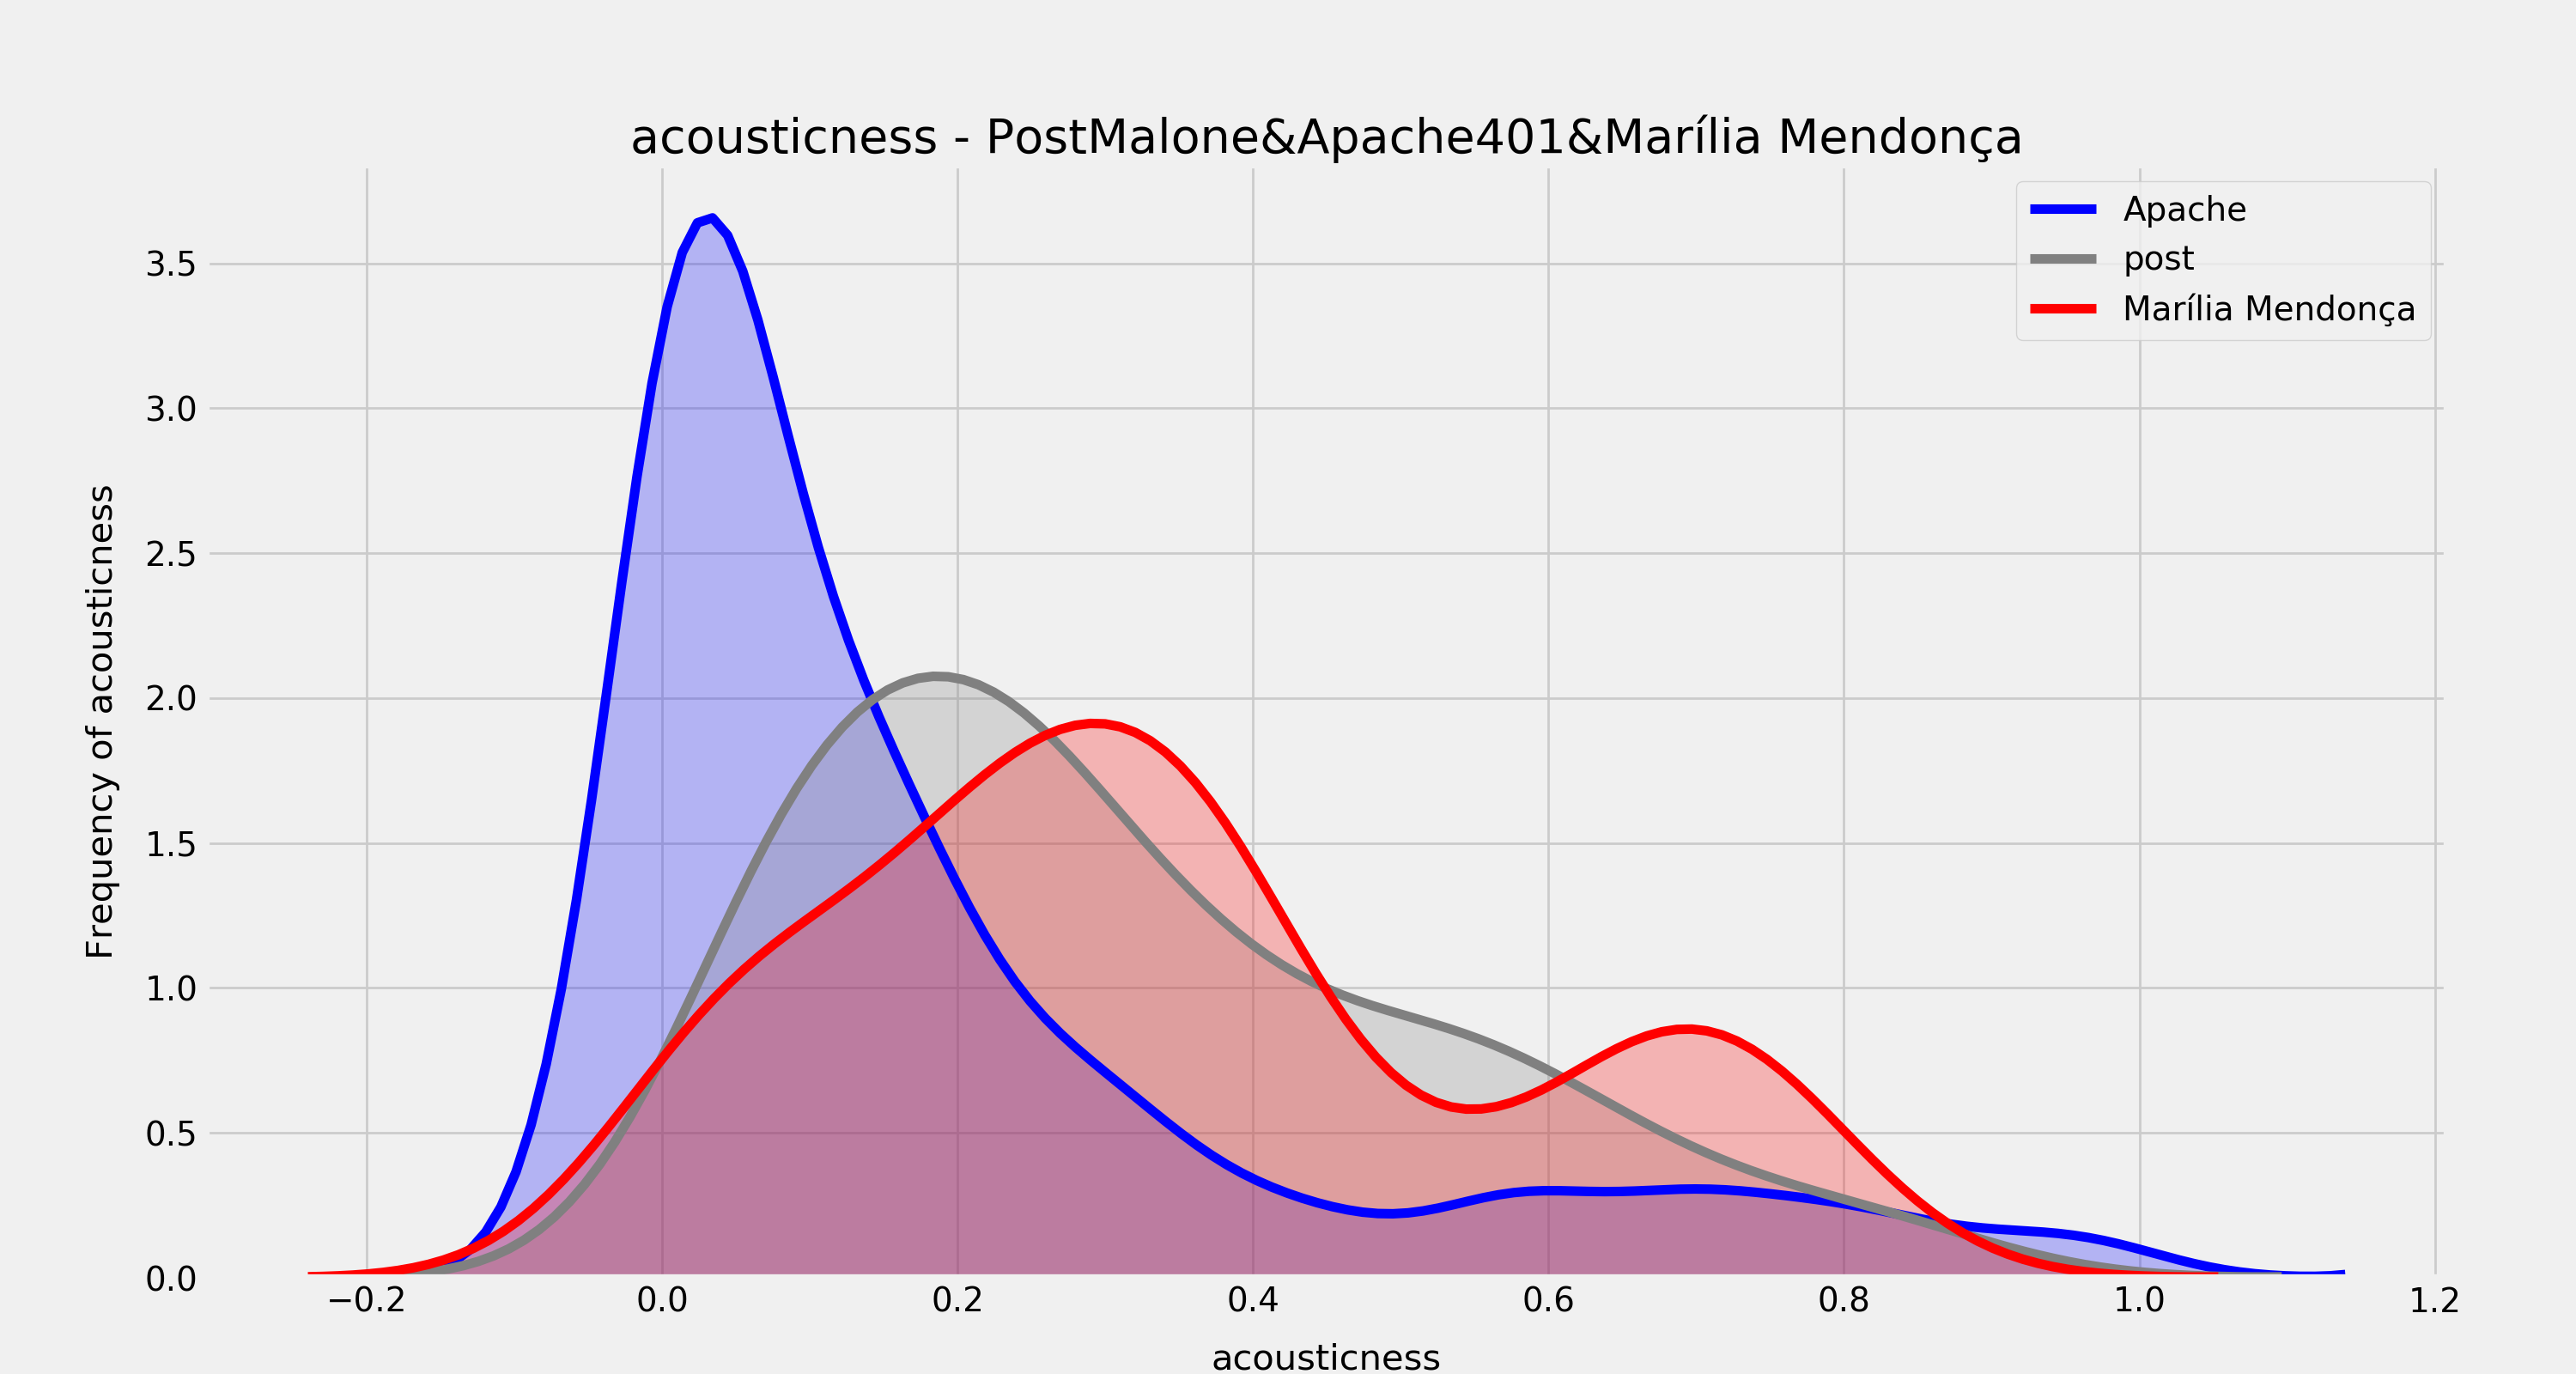

In [177]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == 'Apache401' ),'acousticness'] , color='blue',shade=True,label='Apache')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "PostMalone"),'acousticness'] , color='gray',shade=True, label='post')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "marillia"),'acousticness'] , color='red',shade=True, label='Marília Mendonça')

plt.title('acousticness - PostMalone&Apache401&Marília Mendonça', fontsize = 20, pad = 5)
plt.ylabel("Frequency of acousticness", fontsize = 15, labelpad = 10)
plt.xlabel("acousticness", fontsize = 15, labelpad = 10);

In [186]:
anova_danceability = ols('danceability~ Artist',data=newdf).fit()
anova_danceability.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     35.31
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           4.03e-15
Time:                        12:21:22   Log-Likelihood:                 358.81
No. Observations:                 533   AIC:                            -711.6
Df Residuals:                     530   BIC:                            -698.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6708      0.007     92.616      0.000       0.657       0.685
Artist[T.PostMalone]    -0.0546      0.013     -4.231      0.000      -0.080      -0.029
Artist[T.marillia]       0.0800      0.014      5.718      0.000       0.053       0.107
==============================================================================
Omnibus:                      115.369   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.515
Skew:                          -1.026   Prob(JB):                     4.21e-75
Kurtosis:                       6.348   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
anova_acousticness = ols('acousticness~ Artist',data=newdf).fit()
anova_acousticness.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acousticness   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     26.29
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           1.31e-11
Time:                        10:08:24   Log-Likelihood:                 35.876
No. Observations:                 533   AIC:                            -65.75
Df Residuals:                     530   BIC:                            -52.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1816      0.013     13.680      0.000       0.156       0.208
Artist[T.PostMalone]     0.1264      0.024      5.342      0.000       0.080       0.173
Artist[T.marillia]       0.1600      0.026      6.243      0.000       0.110       0.210
==============================================================================
Omnibus:                      113.914   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.171
Skew:                           1.322   Prob(JB):                     5.07e-42
Kurtosis:                       4.252   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


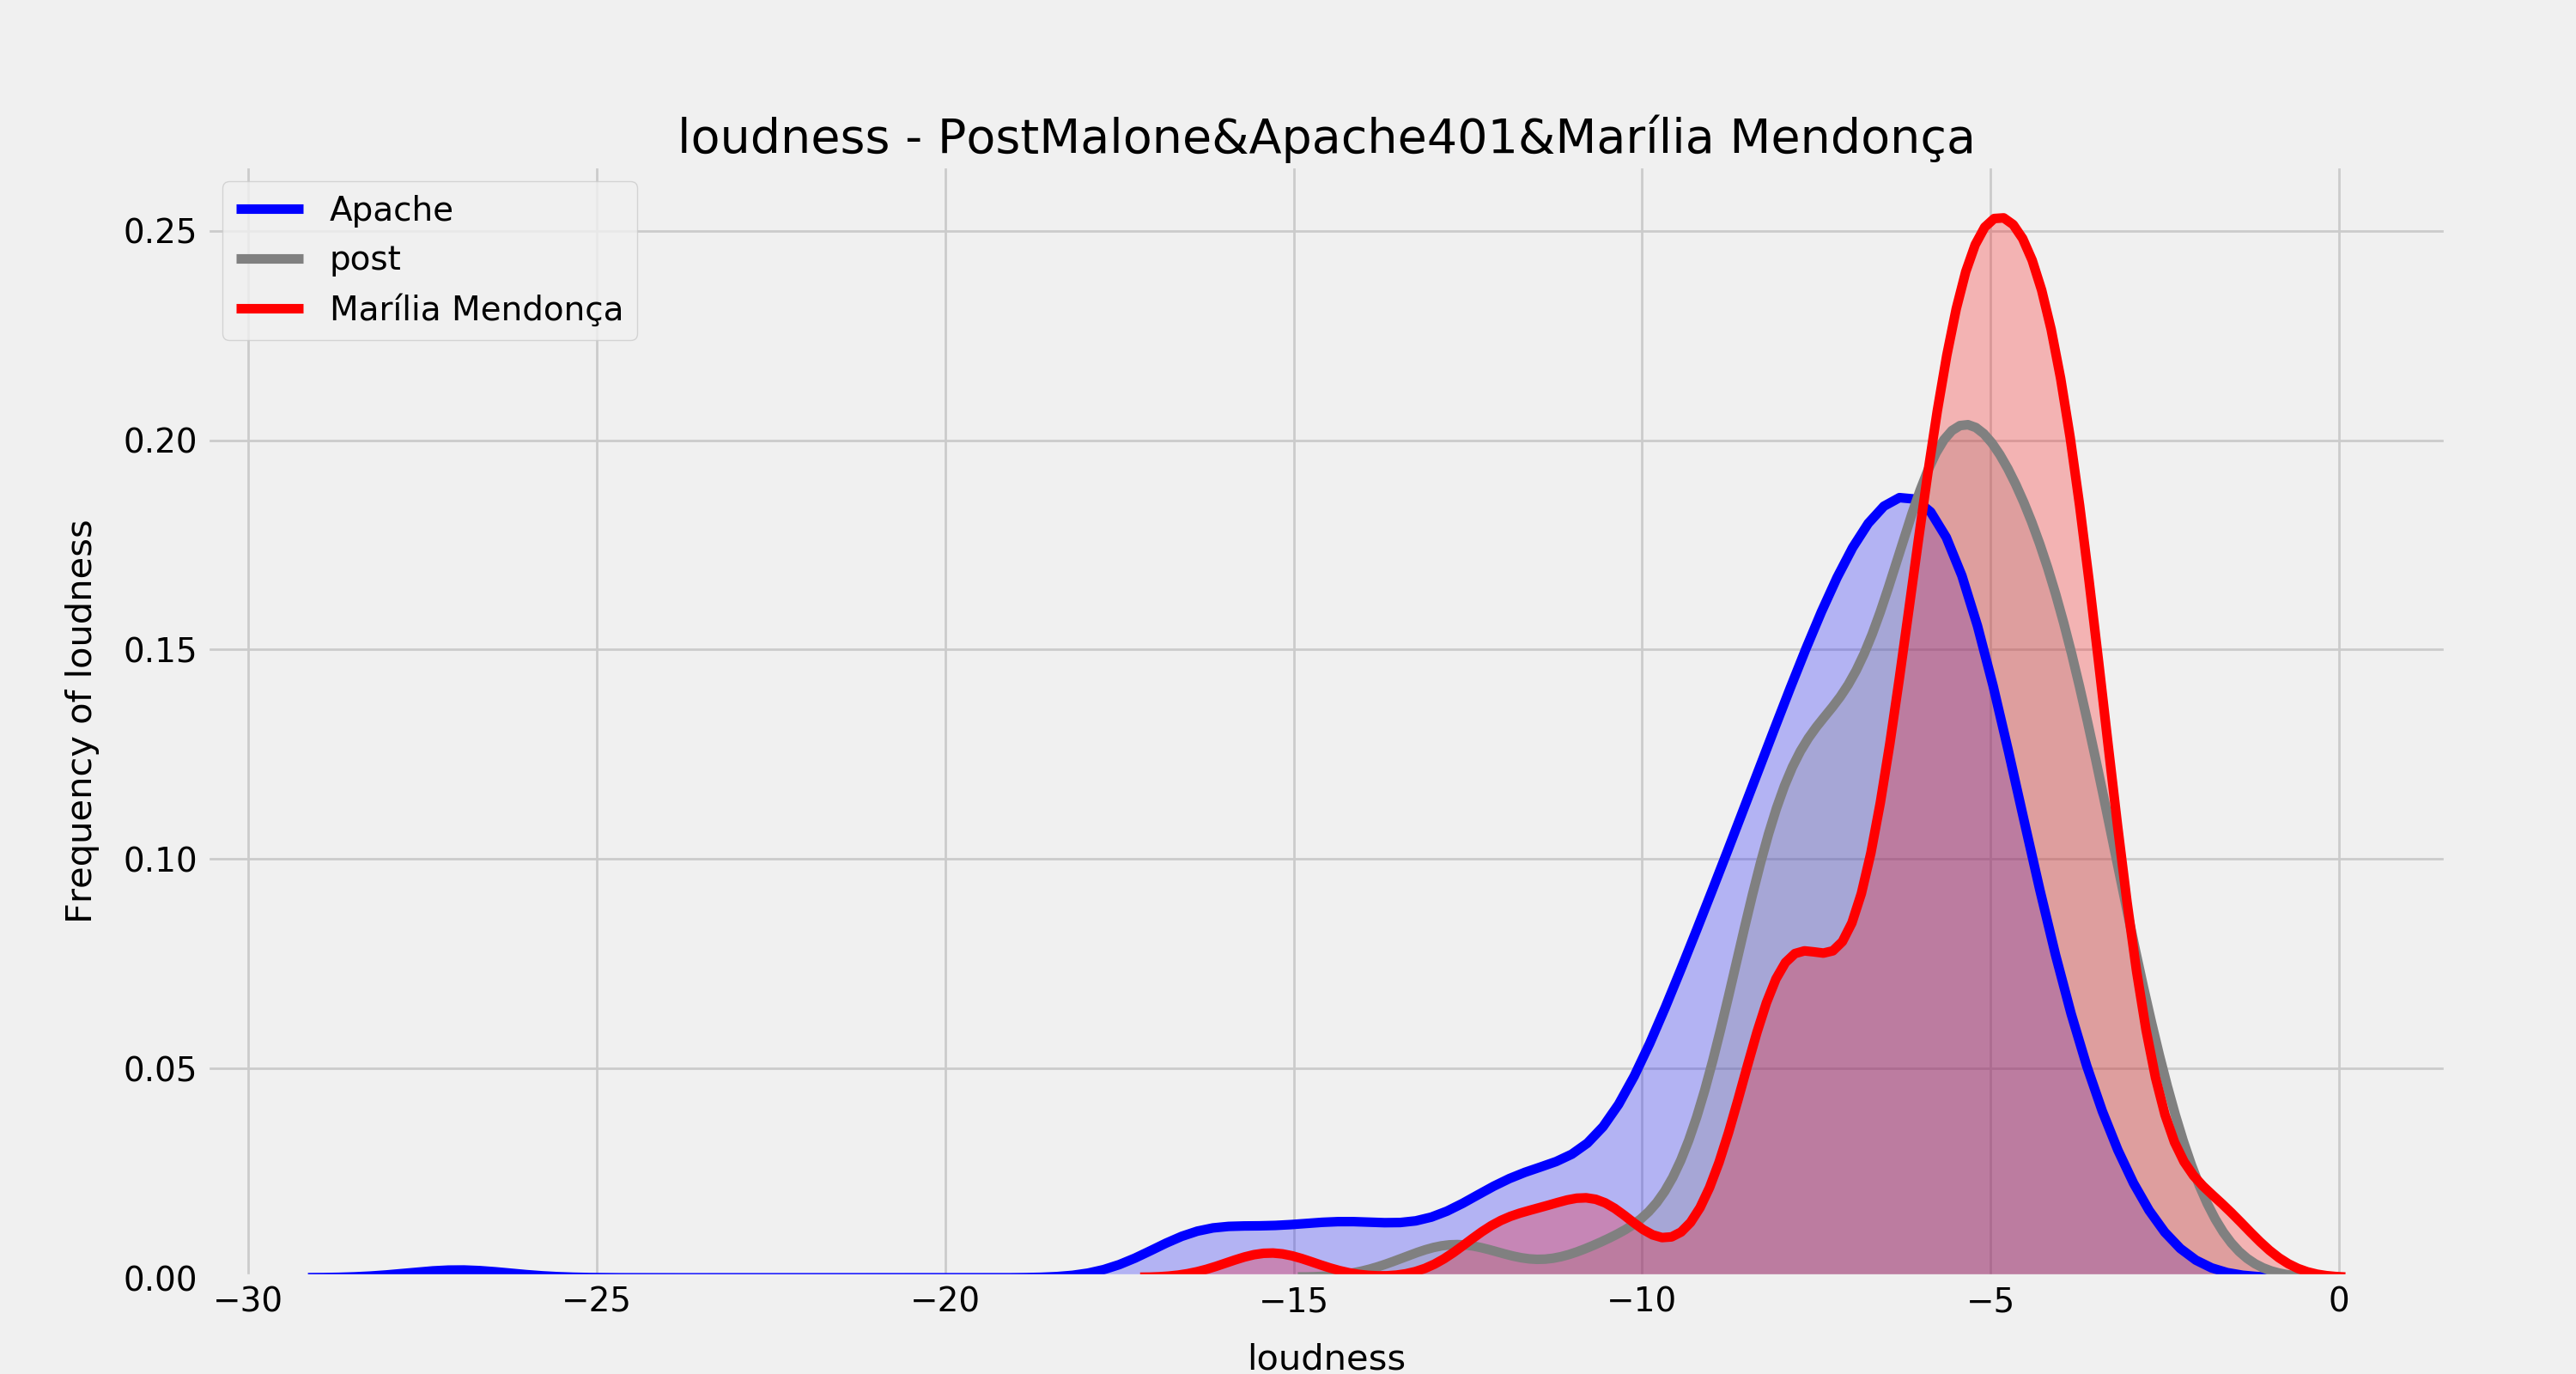

In [178]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == 'Apache401' ),'loudness'] , color='blue',shade=True,label='Apache')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "PostMalone"),'loudness'] , color='gray',shade=True, label='post')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "marillia"),'loudness'] , color='red',shade=True, label='Marília Mendonça')

plt.title('loudness - PostMalone&Apache401&Marília Mendonça', fontsize = 20, pad = 5)
plt.ylabel("Frequency of loudness", fontsize = 15, labelpad = 10)
plt.xlabel("loudness", fontsize = 15, labelpad = 10);

<IPython.core.display.Javascript object>


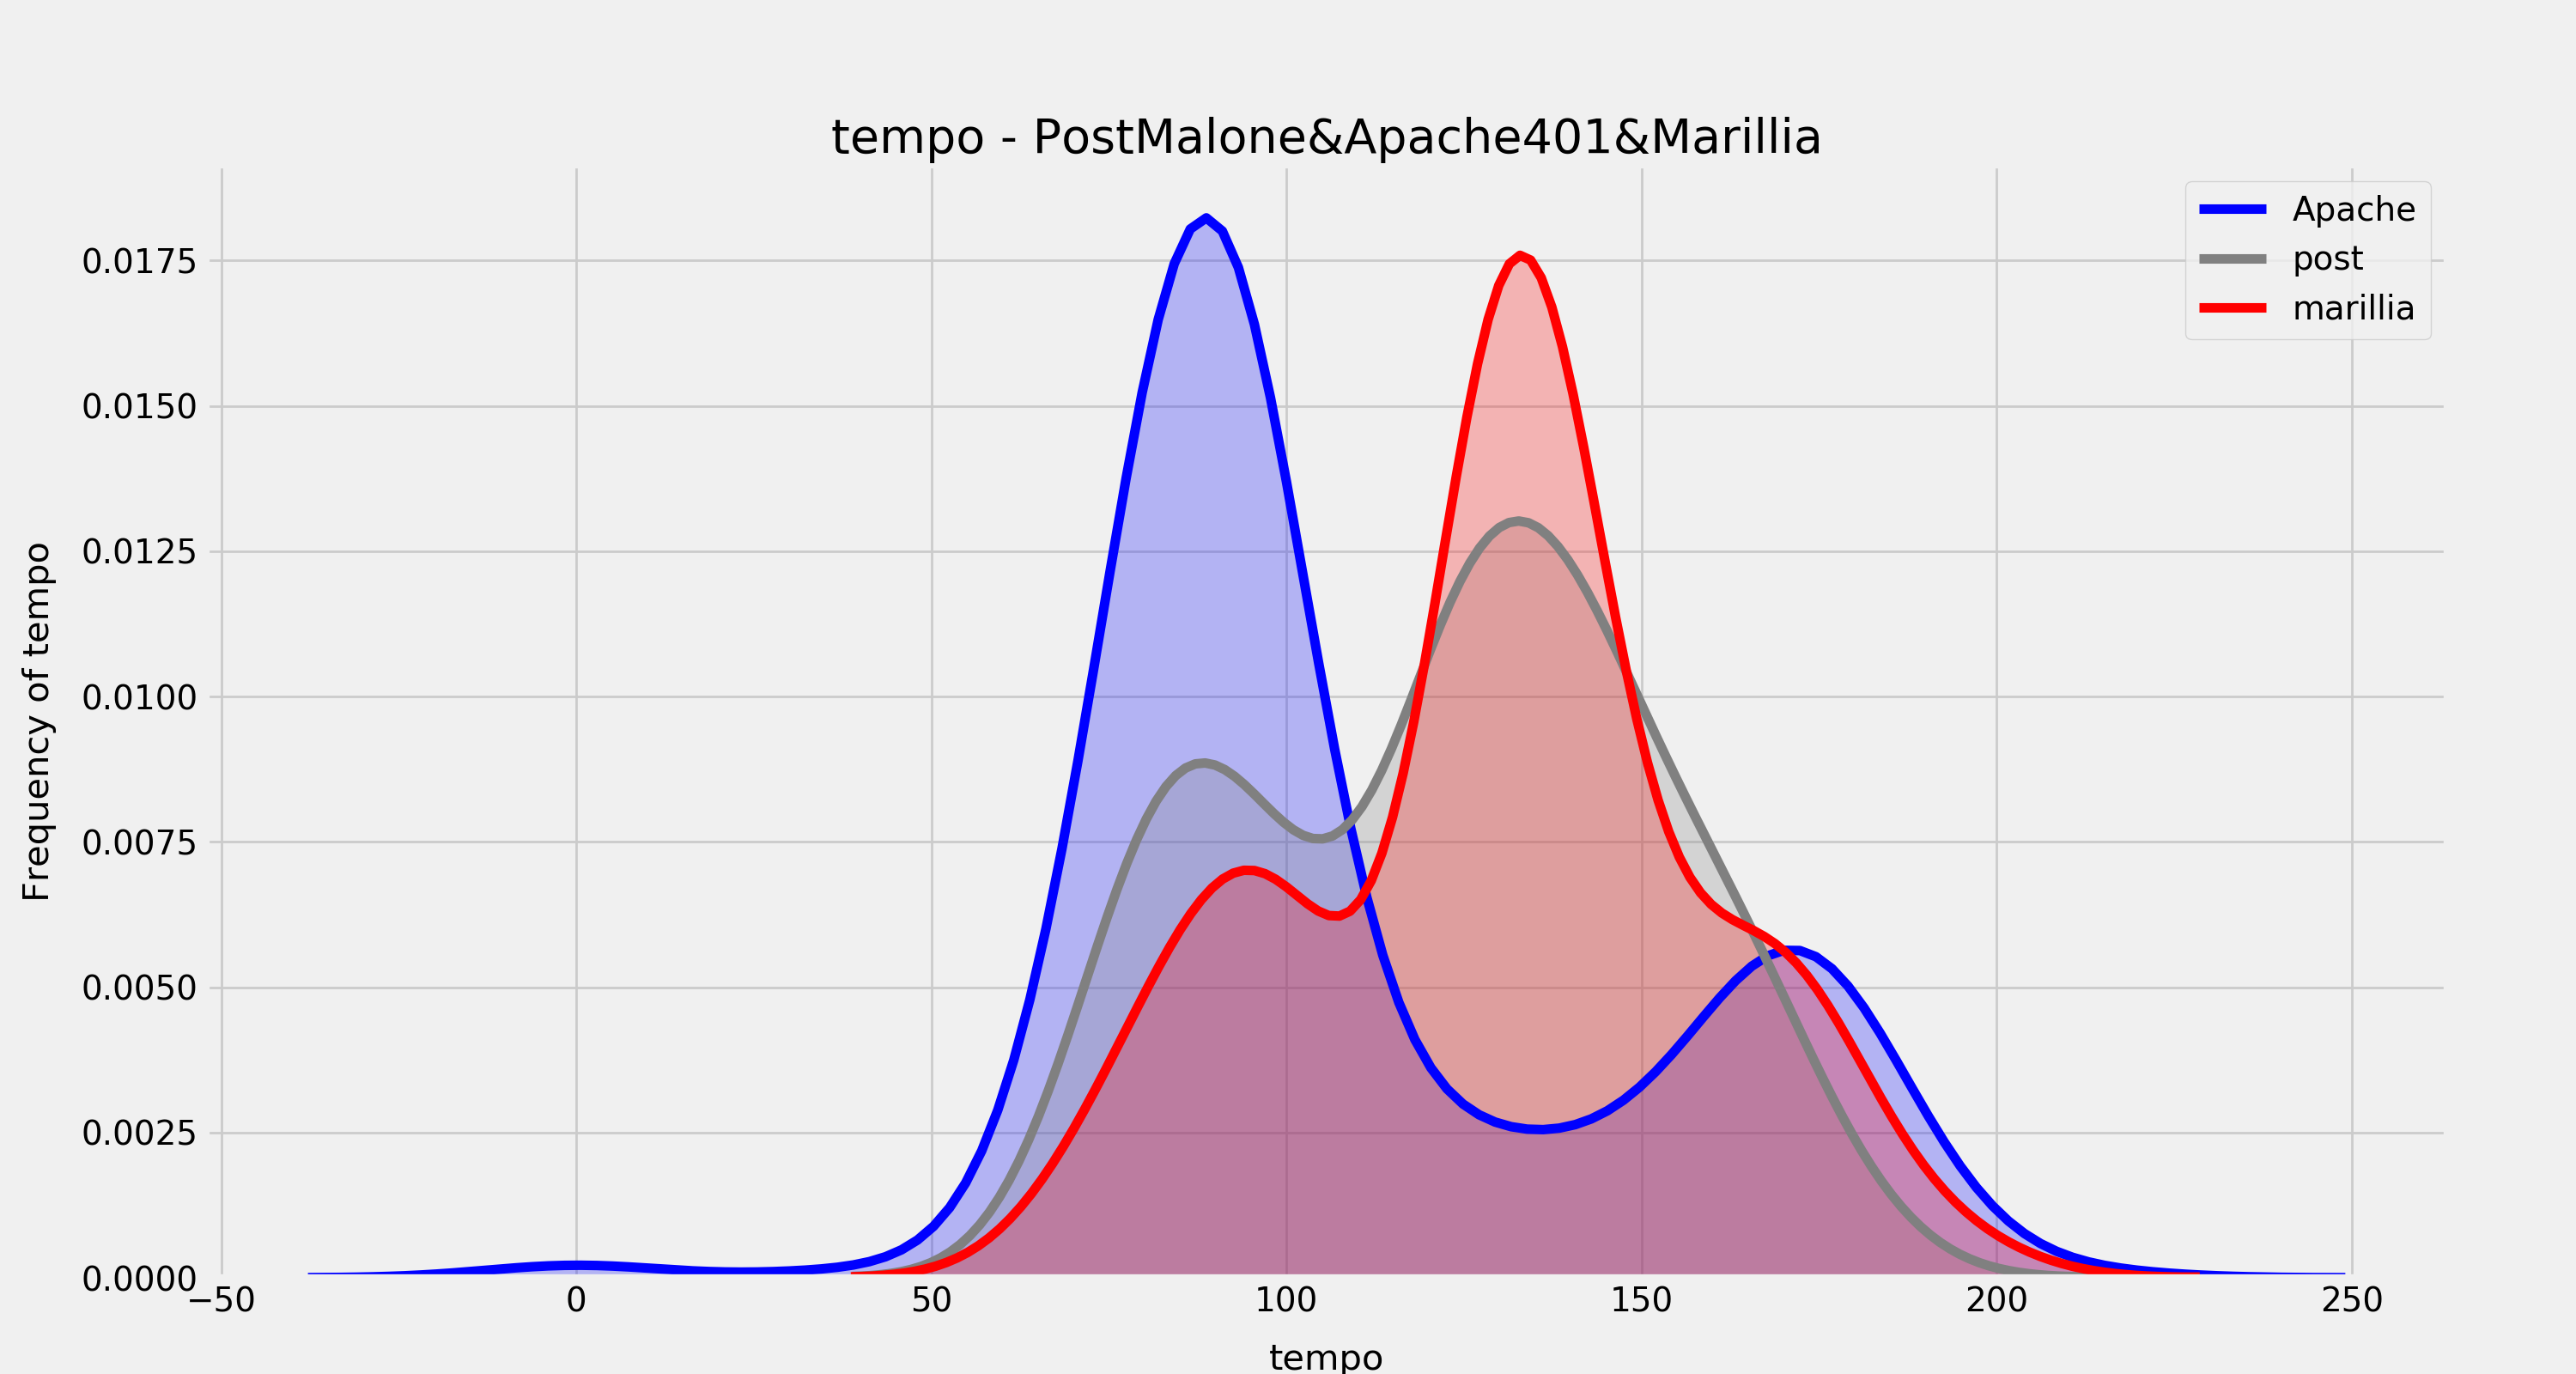

In [167]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == 'Apache401' ),'tempo'] , color='blue',shade=True,label='Apache')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "PostMalone"),'tempo'] , color='gray',shade=True, label='post')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "marillia"),'tempo'] , color='red',shade=True, label='Marília Mendonça')

plt.title('tempo - PostMalone&Apache401&Marília Mendonça', fontsize = 20, pad = 5)
plt.ylabel("Frequency of tempo", fontsize = 15, labelpad = 10)
plt.xlabel("tempo", fontsize = 15, labelpad = 10);

In [174]:
newdf.columns

Index(['album', 'track_number', 'id', 'name', 'uri', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'Artist',
       'Artistfactor'],
      dtype='object')

<IPython.core.display.Javascript object>


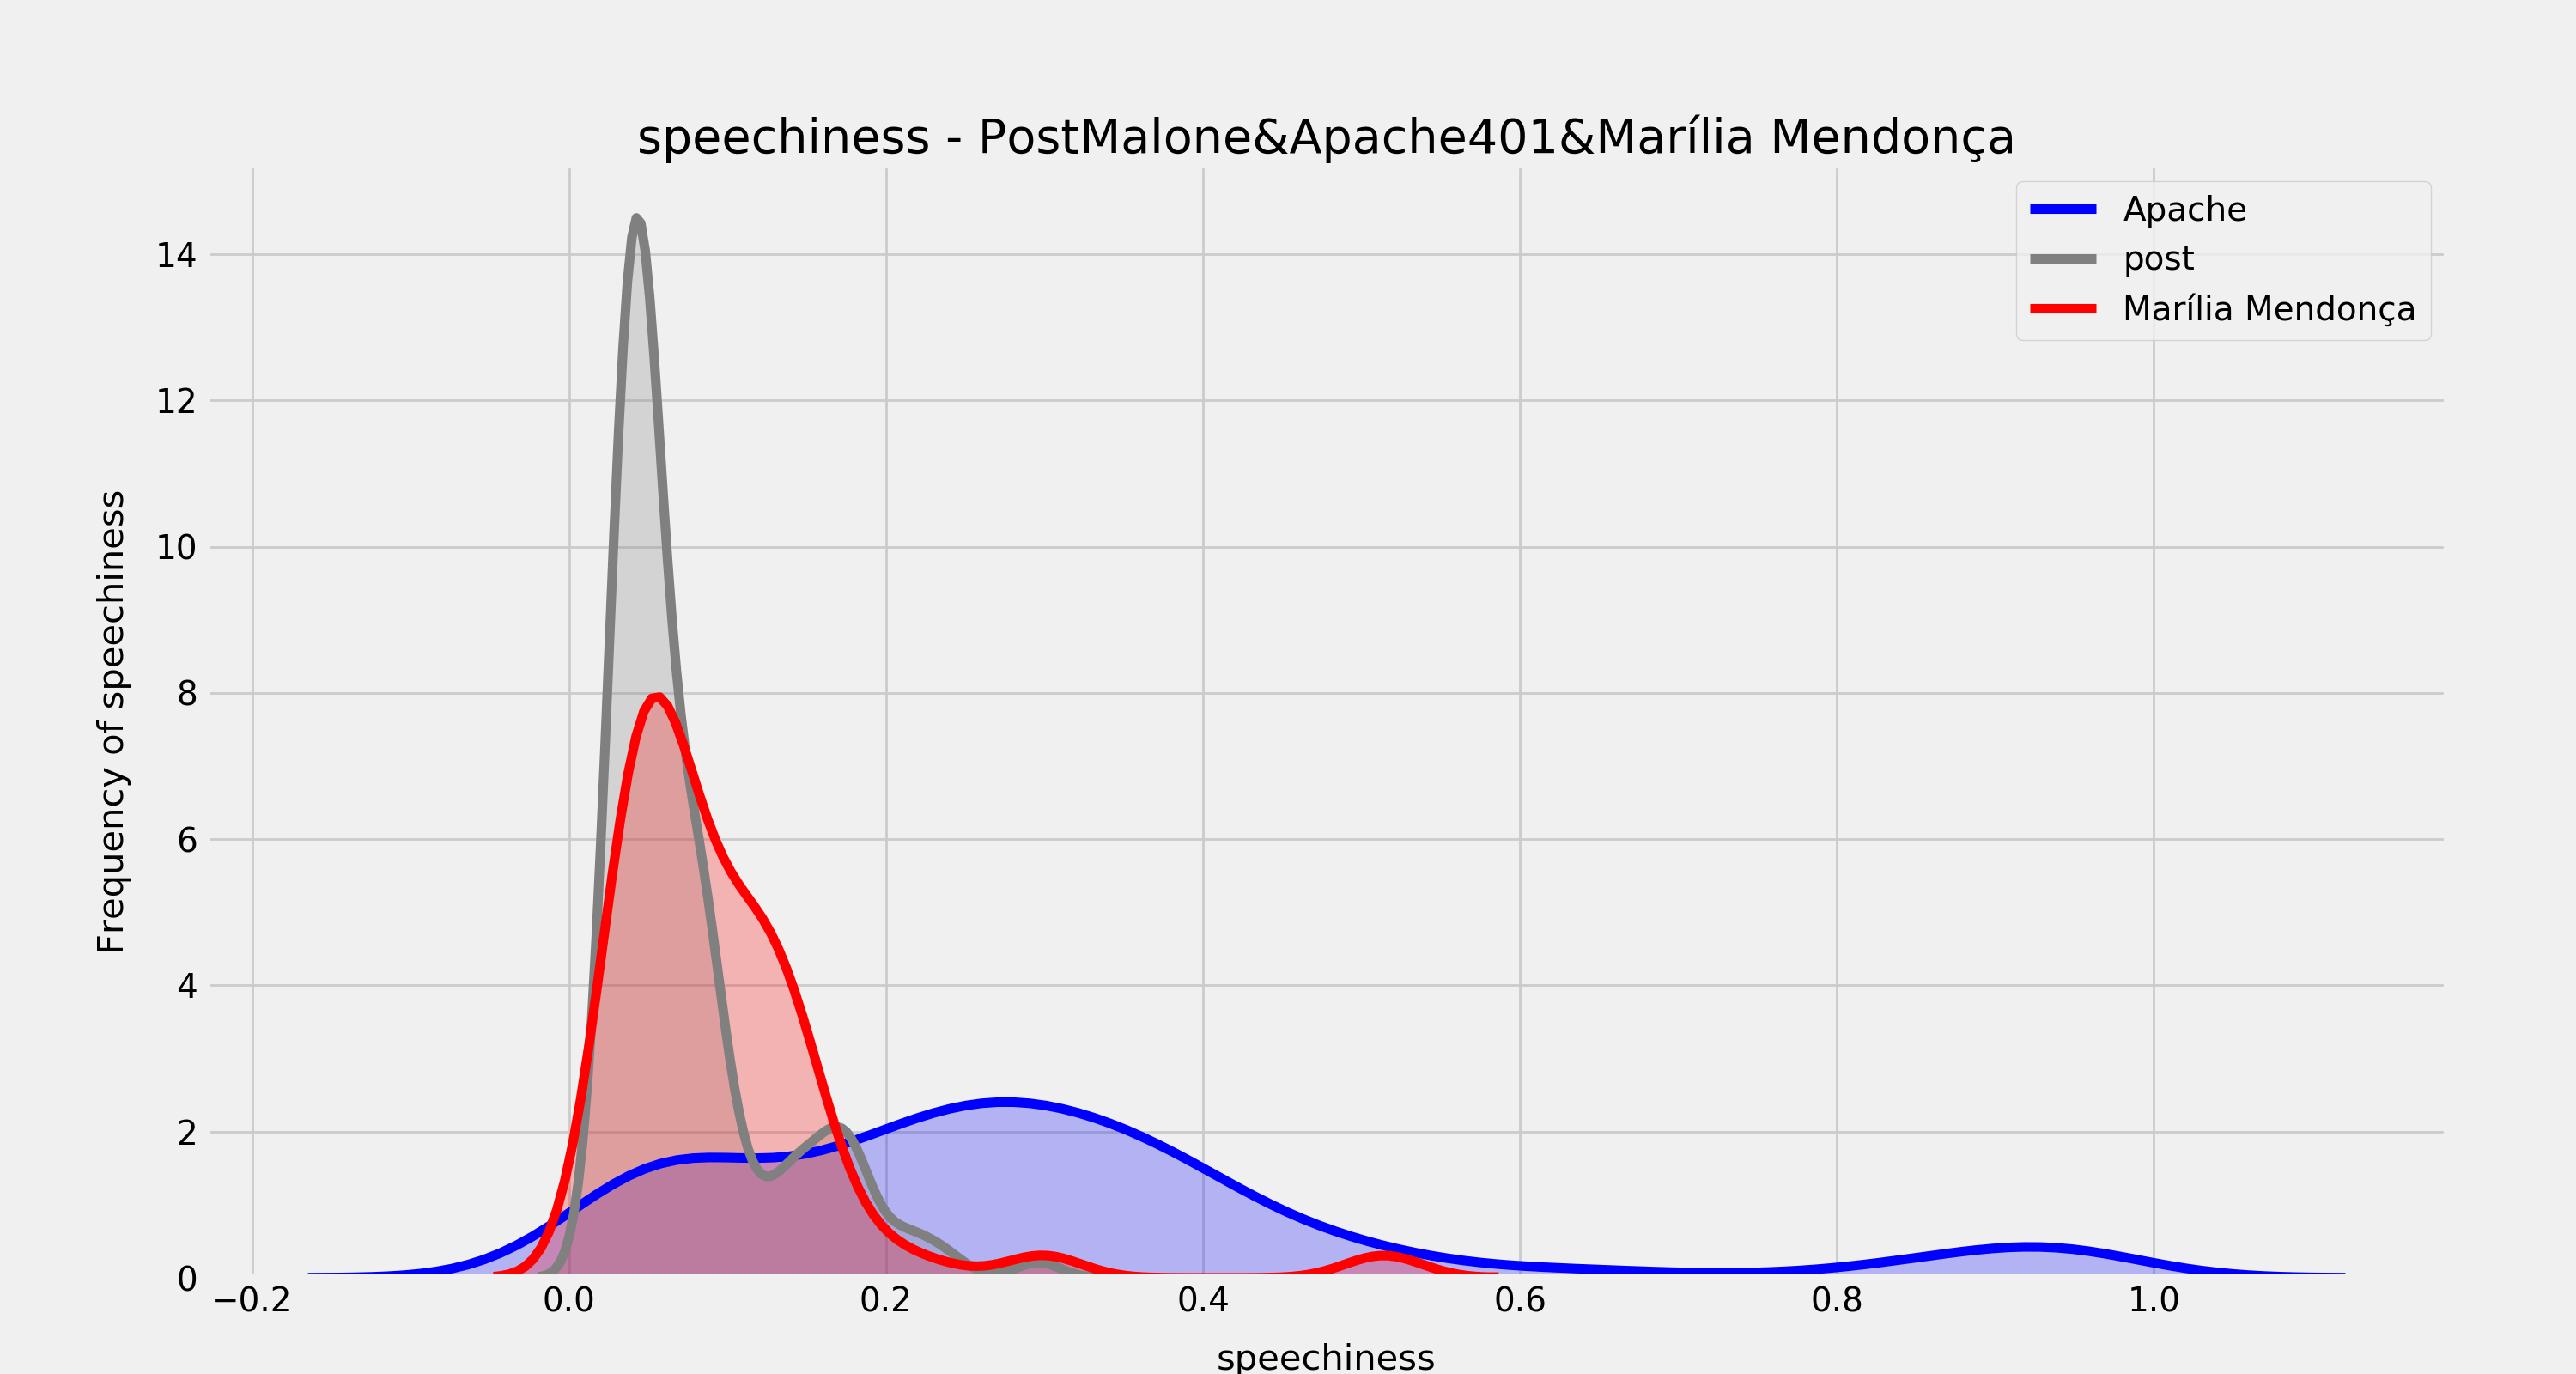

In [180]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == 'Apache401' ),'speechiness'] , color='blue',shade=True,label='Apache')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "PostMalone"),'speechiness'] , color='gray',shade=True, label='post')
ax = sns.kdeplot(newdf.loc[(newdf['Artist'] == "marillia"),'speechiness'] , color='red',shade=True, label='Marília Mendonça')

plt.title('speechiness - PostMalone&Apache401&Marília Mendonça', fontsize = 20, pad = 5)
plt.ylabel("Frequency of speechiness", fontsize = 15, labelpad = 10)
plt.xlabel("speechiness", fontsize = 15, labelpad = 10);

In [134]:
newdf.columns

Index(['album', 'track_number', 'id', 'name', 'uri', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'Artist'],
      dtype='object')

In [136]:
anova_liveness= ols('liveness~ Artist',data=newdf).fit()
anova_liveness.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               liveness   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     15.16
Date:                Thu, 14 Nov 2019   Prob (F-statistic):           3.97e-07
Time:                        10:09:02   Log-Likelihood:                 7.8849
No. Observations:                 533   AIC:                            -9.770
Df Residuals:                     530   BIC:                             3.066
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2762      0.014     19.738      0.000       0.249       0.304
Artist[T.PostMalone]    -0.1353      0.025     -5.422      0.000      -0.184      -0.086
Artist[T.marillia]      -0.0178      0.027     -0.658      0.511      -0.071       0.035
==============================================================================
Omnibus:                      166.154   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.940
Skew:                           1.711   Prob(JB):                     1.88e-78
Kurtosis:                       5.099   Cond. No.                         3.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
newdf['Artistfactor'] = newdf.Artist.factorize()[0]

In [185]:
newdf.loc[:, 'acousticness':'valence'].corr()


acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.075124 -0.413121         -0.150531   
danceability         -0.075124      1.000000  0.103482         -0.025106   
energy               -0.413121      0.103482  1.000000         -0.200518   
instrumentalness     -0.150531     -0.025106 -0.200518          1.000000   
liveness              0.016092     -0.074865  0.156091         -0.059679   
loudness             -0.295199      0.081284  0.612269         -0.073598   
speechiness           0.129982      0.017908 -0.131756         -0.158824   
tempo                -0.038117     -0.069055  0.132150          0.062306   
valence               0.007197      0.464033  0.311429         -0.063206   

                  liveness  loudness  speechiness     tempo   valence  
acousticness      0.016092 -0.295199     0.129982 -0.038117  0.007197  
danceability     -0.074865  0.081284     0.017908 -0.069055  0.464033  
energy            0.156091  0.612269    -0.131756  0.132150  0.311429  
instrumentalness -0.059679 -0.073598    -0.158824  0.062306 -0.063206  
liveness          1.000000 -0.273849     0.218829  0.009230  0.105350  
loudness         -0.273849  1.000000    -0.479573  0.171950  0.060744  
speechiness       0.218829 -0.479573     1.000000 -0.140946  0.184087  
tempo             0.009230  0.171950    -0.140946  1.000000  0.068689  
valence           0.105350  0.060744     0.184087  0.068689  1.000000

In [155]:
newdf['Artistfactor']

0      0
1      0
2      0
3      0
4      0
      ..
287    2
288    2
289    2
290    2
291    2
Name: Artistfactor, Length: 533, dtype: int64

In [162]:
import statsmodels.api as sm
X = newdf[['acousticness','danceability', 'energy', 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 'valence','Artistfactor']]
y = newdf['popularity']
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              323.0
Date:                Thu, 14 Nov 2019   Prob (F-statistic):                   1.75e-216
Time:                        10:29:12   Log-Likelihood:                         -2261.1
No. Observations:                 533   AIC:                                      4542.
Df Residuals:                     523   BIC:                                      4585.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness         2.7053      3.610      0.749      0.454      -4.387       9.798
danceability        25.7788      5.547      4.648      0.000      14.882      36.675
energy              45.5990      5.004      9.112      0.000      35.768      55.430
instrumentalness   -10.6853      4.077     -2.621      0.009     -18.694      -2.676
liveness           -14.9979      3.359     -4.464      0.000     -21.597      -8.398
loudness            -1.3221      0.348     -3.795      0.000      -2.007      -0.638
speechiness         -4.1421      4.965     -0.834      0.405     -13.896       5.611
tempo                0.0816      0.021      3.868      0.000       0.040       0.123
valence            -22.2623      3.883     -5.733      0.000     -29.891     -14.633
Artistfactor        -7.3178      1.261     -5.805      0.000      -9.794      -4.841
==============================================================================
Omnibus:                        3.670   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                4.012
Skew:                           0.084   Prob(JB):                        0.135
Kurtosis:                       3.390   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""